In [1]:
# Import Required Libraries
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl

In [2]:
# To show all columns
pd.set_option('display.max_columns', None)

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# 1. Read and Inspect DTI Dataset

In [3]:
dti = pd.read_csv('../../data/dti-competitive-index/2-merged/merged-dti-data.csv')
dti.head()

,city_municipality,2018 - Local Economy Size,2018 - Local Economy Growth,2018 - Active Establishments in the Locality,2018 - Safety Compliant Business,2018 - Employment Generation,2018 - Cost of Living,2018 - Cost of Doing Business,2018 - Financial Deepening,2018 - Productivity,2018 - Presence of Business and Professional Organizations,2018 - Compliance to National Directives,2018 - Presence of Investment Promotion Unit,2018 - Compliance to ARTA Citizens Charter,2018 - Capacity to Generate Local Resource,2018 - Capacity of Health Services,2018 - Capacity of School Services,2018 - Recognition of Performance,2018 - Getting Business Permits,2018 - Peace and Order,2018 - Social Protection,2018 - Road Network,2018 - Distance to Ports,2018 - Availability of Basic Utilities,2018 - Transportation Vehicles,2018 - Education,2018 - Health,2018 - LGU Investment,2018 - Accommodation Capacity,2018 - Information Technology Capacity,2018 - Financial Technology Capacity,2018 - Land Use Plan,2018 - Disaster Risk Reduction Plan,2018 - Annual Disaster Drill,2018 - Early Warning System,2018 - Budget for DRRMP,2018 - Local Risk Assessments,2018 - Emergency Infrastructure,2018 - Utilities,2018 - Employed Population,2018 - Sanitary System,2019 - Local Economy Size,2019 - Local Economy Growth,2019 - Active Establishments in the Locality,2019 - Safety Compliant Business,2019 - Employment Generation,2019 - Cost of Living,2019 - Cost of Doing Business,2019 - Financial Deepening,2019 - Productivity,2019 - Presence of Business and Professional Organizations,2019 - Compliance to National Directives,2019 - Presence of Investment Promotion Unit,2019 - Compliance to ARTA Citizens Charter,2019 - Capacity to Generate Local Resource,2019 - Capacity of Health Services,2019 - Capacity of School Services,2019 - Recognition of Performance,2019 - Getting Business Permits,2019 - Peace and Order,2019 - Social Protection,2019 - Road Network,2019 - Distance to Ports,2019 - Availability of Basic Utilities,2019 - Transportation Vehicles,2019 - Education,2019 - Health,2019 - LGU Investment,2019 - Accommodation Capacity,2019 - Information Technology Capacity,2019 - Financial Technology Capacity,2019 - Land Use Plan,2019 - Disaster Risk Reduction Plan,2019 - Annual Disaster Drill,2019 - Early Warning System,2019 - Budget for DRRMP,2019 - Local Risk Assessments,2019 - Emergency Infrastructure,2019 - Utilities,2019 - Employed Population,2019 - Sanitary System,2020 - Local Economy Size,2020 - Local Economy Growth,2020 - Active Establishments in the Locality,2020 - Safety Compliant Business,2020 - Employment Generation,2020 - Cost of Living,2020 - Cost of Doing Business,2020 - Financial Deepening,2020 - Productivity,2020 - Presence of Business and Professional Organizations,2020 - Compliance to National Directives,2020 - Presence of Investment Promotion Unit,2020 - Compliance to ARTA Citizens Charter,2020 - Capacity to Generate Local Resource,2020 - Capacity of Health Services,2020 - Capacity of School Services,2020 - Recognition of Performance,2020 - Getting Business Permits,2020 - Peace and Order,2020 - Social Protection,2020 - Road Network,2020 - Distance to Ports,2020 - Availability of Basic Utilities,2020 - Transportation Vehicles,2020 - Education,2020 - Health,2020 - LGU Investment,2020 - Accommodation Capacity,2020 - Information Technology Capacity,2020 - Financial Technology Capacity,2020 - Land Use Plan,2020 - Disaster Risk Reduction Plan,2020 - Annual Disaster Drill,2020 - Early Warning System,2020 - Budget for DRRMP,2020 - Local Risk Assessments,2020 - Emergency Infrastructure,2020 - Utilities,2020 - Employed Population,2020 - Sanitary System,2021 - Local Economy Size,2021 - Local Economy Growth,2021 - Active Establishments in the Locality,2021 - Safety Compliant Business,2021 - Employment Generation,2021 - Cost of Living,2021 - Cost of Doing Business,2021 - Financial Deepening,2021 - Productivity,2021 - Presence of Business and Professional Organizations,2021 - Complia

In [4]:
df = gpd.read_file('../../data/merged-dataset/merged-dataset-shpfile/merged-dataset.shp')
df = pd.DataFrame(df)
df.head(1)

,psgc,name,city_munic,province,clean_idx,longitude,latitude,coords,2018 - Loc,2018 - L_1,2018 - Act,2018 - Saf,2018 - Emp,2018 - Cos,2018 - C_1,2018 - Fin,2018 - Pro,2018 - Pre,2018 - Com,2018 - P_1,2018 - C_2,2018 - Cap,2018 - C_3,2018 - C_4,2018 - Rec,2018 - Get,2018 - Pea,2018 - Soc,2018 - Roa,2018 - Dis,2018 - Ava,2018 - Tra,2018 - Edu,2018 - Hea,2018 - LGU,2018 - Acc,2018 - Inf,2018 - F_1,2018 - Lan,2018 - D_1,2018 - Ann,2018 - Ear,2018 - Bud,2018 - L_2,2018 - Eme,2018 - Uti,2018 - E_1,2018 - San,2019 - Loc,2019 - L_1,2019 - Act,2019 - Saf,2019 - Emp,2019 - Cos,2019 - C_1,2019 - Fin,2019 - Pro,2019 - Pre,2019 - Com,2019 - P_1,2019 - C_2,2019 - Cap,2019 - C_3,2019 - C_4,2019 - Rec,2019 - Get,2019 - Pea,2019 - Soc,2019 - Roa,2019 - Dis,2019 - Ava,2019 - Tra,2019 - Edu,2019 - Hea,2019 - LGU,2019 - Acc,2019 - Inf,2019 - F_1,2019 - Lan,2019 - D_1,2019 - Ann,2019 - Ear,2019 - Bud,2019 - L_2,2019 - Eme,2019 - Uti,2019 - E_1,2019 - San,2020 - Loc,2020 - L_1,2020 - Act,2020 - Saf,2020 - Emp,2020 - Cos,2020 - C_1,2020 - Fin,2020 - Pro,2020 - Pre,2020 - Com,2020 - P_1,2020 - C_2,2020 - Cap,2020 - C_3,2020 - C_4,2020 - Rec,2020 - Get,2020 - Pea,2020 - Soc,2020 - Roa,2020 - Dis,2020 - Ava,2020 - Tra,2020 - Edu,2020 - Hea,2020 - LGU,2020 - Acc,2020 - Inf,2020 - F_1,2020 - Lan,2020 - D_1,2020 - Ann,2020 - Ear,2020 - Bud,2020 - L_2,2020 - Eme,2020 - Uti,2020 - E_1,2020 - San,2021 - Loc,2021 - L_1,2021 - Act,2021 - Saf,2021 - Emp,2021 - Cos,2021 - C_1,2021 - Fin,2021 - Pro,2021 - Pre,2021 - Com,2021 - P_1,2021 - C_2,2021 - Cap,2021 - C_3,2021 - C_4,2021 - Rec,2021 - Get,2021 - Pea,2021 - Soc,2021 - Roa,2021 - Dis,2021 - Ava,2021 - Tra,2021 - Edu,2021 - Hea,2021 - LGU,2021 - Acc,2021 - Inf,2021 - F_1,2021 - Lan,2021 - D_1,2021 - Ann,2021 - Ear,2021 - Bud,2021 - L_2,2021 - Eme,2021 - Uti,2021 - E_1,2021 - San,2022 - Loc,2022 - L_1,2022 - Act,2022 - Saf,2022 - Emp,2022 - Cos,2022 - C_1,2022 - Fin,2022 - Pro,2022 - Pre,2022 - Com,2022 - P_1,2022 - C_2,2022 - Cap,2022 - C_3,2022 - C_4,2022 - Rec,2022 - Get,2022 - Pea,2022 - Soc,2022 - Roa,2022 - Dis,2022 - Ava,2022 - Tra,2022 - Edu,2022 - Hea,2022 - LGU,2022 - Acc,2022 - Inf,2022 - F_1,2022 - Lan,2022 - D_1,2022 - Ann,2022 - Ear,2022 - Bud,2022 - L_2,2022 - Eme,2022 - Uti,2022 - E_1,2022 - San,2022 - Sta,2022 - Inn,2022 - STE,2022 - Int,2022 - ICT,2022 - I_1,2022 - A_1,2022 - Onl,2022 - I_2,2022 - New,Ambulatory,Animal Bit,Barangay H,Birthing H,City Healt,DepEd Clin,Drug Abuse,General Cl,Hospital (,Infirmary,Municipal,Provincial,Psychiatri,Rural Heal,Social hyg,Ambulato_1,Animal B_1,Barangay_1,Birthing_1,City Hea_1,DepEd Cl_1,Drug Abu_1,General _1,Hospital_1,Infirmar_1,Municipa_1,Provinci_1,Psychiat_1,Rural He_1,Social h_1,DOCTOR,NURSE,MIDWIFE,DENTIST,NUTRITIONI,PHARMACIST,OCCUPATION,MEDICAL TE,PHYSICAL T,RADIOLOGY,X-RAY TECH,Elementary,Secondary_,Enrollment,Enrollme_1,Enrollme_2,Enrollme_3,Water Seal,Closed pit,Open Pit,none,Child Head,Child He_1,Single Hea,Single H_1,Disability,Disabili_1,Solo Paren,Solo Par_1,Older_Male,Older_Fema,geometry
0,1705301000,Aborlan,Aborlan,Palawan,"aborlan, palawan",118.548417,9.437101,"9.4371009, 118.5484168",0.0072,0.0224,0.2337,0.1253,0.0197,1.9907,2.1771,0.0423,0.0047,0.0218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0051,0.0024,0.0,0.2553,0.0,0.9127,1.9655,0.1339,0.0004,0.0007,2.2,2.5,1.9499,0.0074,0.0614,0.1451,0.0595,2.3451,0.0012,0.0007,0.1006,2.3204,2.1047,0.0029,0.13,0.0689,0.3137,0.0,0.0806,0.0671,2.4231,2.4537,2.25,2.5,0.2189,2.5,0.4984,1.8558,0.0401,1.4921,0.0013,0.1419,0.1653,0.1643,0.0651,0.3017,2.2798,0.139,0.0413,0.0216,2.4242,0.625,2.2404,0.0083,0.0587,0.0488,0.0023,2.3385,0.0072,0.0024,0.0006,2.4933,2.3125,0.0026,0.1185,0.083,0.1665,0.0,0.2679,0.0631,2.5,2.5,2.5,2.5,0.0852,2.5,0.5004,1.8706,0.0385,0.9946,0.0067,0.0045,0.2606,0.1683,0.1052,1.625,2.3654,0.1231,0.069,0.1089,2.2619,1.875,2.1365,0.0061,0.1064,0.0145,0.0,1.8169,0.0283,0.1047,0.1846,2.3721,2.2948,0.003,0.0

In [5]:
# Setting the index as city_municipality
dti = pd.DataFrame(dti).set_index('city_municipality')

In [6]:
# Finding the rows that has 100% null values
dti[dti.isna().all(axis=1)]

,2018 - Local Economy Size,2018 - Local Economy Growth,2018 - Active Establishments in the Locality,2018 - Safety Compliant Business,2018 - Employment Generation,2018 - Cost of Living,2018 - Cost of Doing Business,2018 - Financial Deepening,2018 - Productivity,2018 - Presence of Business and Professional Organizations,2018 - Compliance to National Directives,2018 - Presence of Investment Promotion Unit,2018 - Compliance to ARTA Citizens Charter,2018 - Capacity to Generate Local Resource,2018 - Capacity of Health Services,2018 - Capacity of School Services,2018 - Recognition of Performance,2018 - Getting Business Permits,2018 - Peace and Order,2018 - Social Protection,2018 - Road Network,2018 - Distance to Ports,2018 - Availability of Basic Utilities,2018 - Transportation Vehicles,2018 - Education,2018 - Health,2018 - LGU Investment,2018 - Accommodation Capacity,2018 - Information Technology Capacity,2018 - Financial Technology Capacity,2018 - Land Use Plan,2018 - Disaster Risk Reduction Plan,2018 - Annual Disaster Drill,2018 - Early Warning System,2018 - Budget for DRRMP,2018 - Local Risk Assessments,2018 - Emergency Infrastructure,2018 - Utilities,2018 - Employed Population,2018 - Sanitary System,2019 - Local Economy Size,2019 - Local Economy Growth,2019 - Active Establishments in the Locality,2019 - Safety Compliant Business,2019 - Employment Generation,2019 - Cost of Living,2019 - Cost of Doing Business,2019 - Financial Deepening,2019 - Productivity,2019 - Presence of Business and Professional Organizations,2019 - Compliance to National Directives,2019 - Presence of Investment Promotion Unit,2019 - Compliance to ARTA Citizens Charter,2019 - Capacity to Generate Local Resource,2019 - Capacity of Health Services,2019 - Capacity of School Services,2019 - Recognition of Performance,2019 - Getting Business Permits,2019 - Peace and Order,2019 - Social Protection,2019 - Road Network,2019 - Distance to Ports,2019 - Availability of Basic Utilities,2019 - Transportation Vehicles,2019 - Education,2019 - Health,2019 - LGU Investment,2019 - Accommodation Capacity,2019 - Information Technology Capacity,2019 - Financial Technology Capacity,2019 - Land Use Plan,2019 - Disaster Risk Reduction Plan,2019 - Annual Disaster Drill,2019 - Early Warning System,2019 - Budget for DRRMP,2019 - Local Risk Assessments,2019 - Emergency Infrastructure,2019 - Utilities,2019 - Employed Population,2019 - Sanitary System,2020 - Local Economy Size,2020 - Local Economy Growth,2020 - Active Establishments in the Locality,2020 - Safety Compliant Business,2020 - Employment Generation,2020 - Cost of Living,2020 - Cost of Doing Business,2020 - Financial Deepening,2020 - Productivity,2020 - Presence of Business and Professional Organizations,2020 - Compliance to National Directives,2020 - Presence of Investment Promotion Unit,2020 - Compliance to ARTA Citizens Charter,2020 - Capacity to Generate Local Resource,2020 - Capacity of Health Services,2020 - Capacity of School Services,2020 - Recognition of Performance,2020 - Getting Business Permits,2020 - Peace and Order,2020 - Social Protection,2020 - Road Network,2020 - Distance to Ports,2020 - Availability of Basic Utilities,2020 - Transportation Vehicles,2020 - Education,2020 - Health,2020 - LGU Investment,2020 - Accommodation Capacity,2020 - Information Technology Capacity,2020 - Financial Technology Capacity,2020 - Land Use Plan,2020 - Disaster Risk Reduction Plan,2020 - Annual Disaster Drill,2020 - Early Warning System,2020 - Budget for DRRMP,2020 - Local Risk Assessments,2020 - Emergency Infrastructure,2020 - Utilities,2020 - Employed Population,2020 - Sanitary System,2021 - Local Economy Size,2021 - Local Economy Growth,2021 - Active Establishments in the Locality,2021 - Safety Compliant Business,2021 - Employment Generation,2021 - Cost of Living,2021 - Cost of Doing Business,2021 - Financial Deepening,2021 - Productivity,2021 - Presence of Business and Professional Organizations,2021 - Compliance to National Di

No rows have 100% null values. So we can try backfilling and frontfilling for any missing values by extraploating values from recent years.

In [7]:
#Creating a dataframe with only 2022 data
cols_2022 = dti.columns[dti.columns.str.startswith('2022')].tolist()
dti_2022 = dti[cols_2022]
dti_2022.head()

,2022 - Local Economy Size,2022 - Local Economy Growth,2022 - Active Establishments in the Locality,2022 - Safety Compliant Business,2022 - Employment Generation,2022 - Cost of Living,2022 - Cost of Doing Business,2022 - Financial Deepening,2022 - Productivity,2022 - Presence of Business and Professional Organizations,2022 - Compliance to National Directives,2022 - Presence of Investment Promotion Unit,2022 - Compliance to ARTA Citizens Charter,2022 - Capacity to Generate Local Resource,2022 - Capacity of Health Services,2022 - Capacity of School Services,2022 - Recognition of Performance,2022 - Getting Business Permits,2022 - Peace and Order,2022 - Social Protection,2022 - Road Network,2022 - Distance to Ports,2022 - Availability of Basic Utilities,2022 - Transportation Vehicles,2022 - Education,2022 - Health,2022 - LGU Investment,2022 - Accommodation Capacity,2022 - Information Technology Capacity,2022 - Financial Technology Capacity,2022 - Land Use Plan,2022 - Disaster Risk Reduction Plan,2022 - Annual Disaster Drill,2022 - Early Warning System,2022 - Budget for DRRMP,2022 - Local Risk Assessments,2022 - Emergency Infrastructure,2022 - Utilities,2022 - Employed Population,2022 - Sanitary System,2022 - Start Up and Innovation Facilities,2022 - Innovation Financing: R&D Expenditures Allotment,2022 - STEM graduates,2022 - Intellectual Property Registration,2022 - ICT Use: E-BPLS Software,2022 - Internet Capability,2022 - Availability of Basic Internet Service,2022 - Online Payment Facilities,2022 - ICT Plan,2022 - New Technology
city_municipality,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aborlan,0.0105,0.0001,0.0662,0.0000,0.0624,1.9279,1.9004,0.0793,0.0341,0.0117,1.8214,1.6667,2.0,0.0028,0.0019,0.0022,0.0000,1.5,0.0644,0.0014,0.0001,1.8963,0.0945,0.0032,0.0749,0.0978,0.0012,0.0000,0.0176,0.0172,1.9848,1.9998,1.002,1.0087,0.0,2.0,0.0292,1.5007,0.0061,1.0002,0.1281,0.0000,0.0195,0.0221,2.0,0.0095,0.0000,0.0,2.0001,0.0
Abra De Ilog,0.0015,0.0000,0.0498,0.0000,0.0171,1.6875,1.8990,0.0443,0.0042,0.0050,1.9643,0.0000,0.0,0.0012,0.0005,0.0018,0.0291,2.0,0.0001,0.0004,0.0001,1.7350,0.0035,0.0322,0.0087,0.0245,0.0004,0.0000,0.0176,0.0000,1.9848,1.9998,1.008,1.0124,0.0,1.0,0.4186,1.5011,0.0632,1.5002,0.0000,0.0000,0.0000,0.0009,2.0,0.0095,0.0000,0.0,0.0000,0.0
Abucay,0.0144,0.0007,0.7920,0.4603,0.8238,1.9990,1.8962,0.2252,0.3706,0.0095,1.8077,1.9997,1.0,0.2974,0.4707,0.0598,0.2537,1.5,0.0015,0.9985,0.0011,1.9823,0.4548,0.0229,0.1527,0.2382,0.0010,0.0246,0.3913,0.0909,1.9595,1.9998,1.002,1.0375,0.0,2.0,0.4144,1.5093,0.0563,1.5000,0.0533,0.0038,0.0047,0.0483,2.0,0.1957,0.1194,0.0,2.0001,0.0
Abulug,0.0144,0.0010,0.3012,0.2501,0.4434,1.9989,1.8972,0.4652,0.2666,0.0000,0.9231,0.0000,2.0,0.0993,0.1017,0.0119,0.0500,0.5,0.0002,0.0026,0.0017,1.8904,0.3911,0.0071,0.0835,0.2296,0.0001,0.0518,0.2174,0.2727,1.9865,0.4993,1.002,1.0040,0.0,2.0,0.5214,1.5000,0.0041,1.5000,0.0267,0.0000,0.0023,0.0000,0.0,0.1087,0.0000,0.0,0.6667,0.0
Abuyog,0.0058,0.0000,0.1413,0.0000,0.0551,1.7596,1.8405,0.2431,0.0386,0.0061,1.8571,1.9744,2.0,0.0026,0.0019,0.0758,0.0000,2.0,0.0000,0.0000,0.0020,1.9130,0.0040,0.0255,0.1161,0.3853,0.0009,0.0000,0.0881,0.0431,1.9242,1.9998,0.000,1.0025,0.0,2.0,0.4103,1.5039,0.0310,1.5002,0.0000,0.0000,0.0522,0.0000,2.0,1.0476,0.0037,0.0,1.3334,0.0


In [8]:
# Remove last 10 columns which are not availble for other years
dti_2022 = dti_2022.iloc[:,0:40]
dti_2022.shape

(1632, 40)

In [9]:
# Remove '2022 - ' from all the column names
dti_2022.columns = dti_2022.columns.str.replace('2022 - ','')
dti_2022.head()

,Local Economy Size,Local Economy Growth,Active Establishments in the Locality,Safety Compliant Business,Employment Generation,Cost of Living,Cost of Doing Business,Financial Deepening,Productivity,Presence of Business and Professional Organizations,Compliance to National Directives,Presence of Investment Promotion Unit,Compliance to ARTA Citizens Charter,Capacity to Generate Local Resource,Capacity of Health Services,Capacity of School Services,Recognition of Performance,Getting Business Permits,Peace and Order,Social Protection,Road Network,Distance to Ports,Availability of Basic Utilities,Transportation Vehicles,Education,Health,LGU Investment,Accommodation Capacity,Information Technology Capacity,Financial Technology Capacity,Land Use Plan,Disaster Risk Reduction Plan,Annual Disaster Drill,Early Warning System,Budget for DRRMP,Local Risk Assessments,Emergency Infrastructure,Utilities,Employed Population,Sanitary System
city_municipality,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aborlan,0.0105,0.0001,0.0662,0.0000,0.0624,1.9279,1.9004,0.0793,0.0341,0.0117,1.8214,1.6667,2.0,0.0028,0.0019,0.0022,0.0000,1.5,0.0644,0.0014,0.0001,1.8963,0.0945,0.0032,0.0749,0.0978,0.0012,0.0000,0.0176,0.0172,1.9848,1.9998,1.002,1.0087,0.0,2.0,0.0292,1.5007,0.0061,1.0002
Abra De Ilog,0.0015,0.0000,0.0498,0.0000,0.0171,1.6875,1.8990,0.0443,0.0042,0.0050,1.9643,0.0000,0.0,0.0012,0.0005,0.0018,0.0291,2.0,0.0001,0.0004,0.0001,1.7350,0.0035,0.0322,0.0087,0.0245,0.0004,0.0000,0.0176,0.0000,1.9848,1.9998,1.008,1.0124,0.0,1.0,0.4186,1.5011,0.0632,1.5002
Abucay,0.0144,0.0007,0.7920,0.4603,0.8238,1.9990,1.8962,0.2252,0.3706,0.0095,1.8077,1.9997,1.0,0.2974,0.4707,0.0598,0.2537,1.5,0.0015,0.9985,0.0011,1.9823,0.4548,0.0229,0.1527,0.2382,0.0010,0.0246,0.3913,0.0909,1.9595,1.9998,1.002,1.0375,0.0,2.0,0.4144,1.5093,0.0563,1.5000
Abulug,0.0144,0.0010,0.3012,0.2501,0.4434,1.9989,1.8972,0.4652,0.2666,0.0000,0.9231,0.0000,2.0,0.0993,0.1017,0.0119,0.0500,0.5,0.0002,0.0026,0.0017,1.8904,0.3911,0.0071,0.0835,0.2296,0.0001,0.0518,0.2174,0.2727,1.9865,0.4993,1.002,1.0040,0.0,2.0,0.5214,1.5000,0.0041,1.5000
Abuyog,0.0058,0.0000,0.1413,0.0000,0.0551,1.7596,1.8405,0.2431,0.0386,0.0061,1.8571,1.9744,2.0,0.0026,0.0019,0.0758,0.0000,2.0,0.0000,0.0000,0.0020,1.9130,0.0040,0.0255,0.1161,0.3853,0.0009,0.0000,0.0881,0.0431,1.9242,1.9998,0.000,1.0025,0.0,2.0,0.4103,1.5039,0.0310,1.5002


In [10]:
# Finding the rows that has 100% null values in dti_2022
dti_2022[dti_2022.isna().all(axis=1)]

,Local Economy Size,Local Economy Growth,Active Establishments in the Locality,Safety Compliant Business,Employment Generation,Cost of Living,Cost of Doing Business,Financial Deepening,Productivity,Presence of Business and Professional Organizations,Compliance to National Directives,Presence of Investment Promotion Unit,Compliance to ARTA Citizens Charter,Capacity to Generate Local Resource,Capacity of Health Services,Capacity of School Services,Recognition of Performance,Getting Business Permits,Peace and Order,Social Protection,Road Network,Distance to Ports,Availability of Basic Utilities,Transportation Vehicles,Education,Health,LGU Investment,Accommodation Capacity,Information Technology Capacity,Financial Technology Capacity,Land Use Plan,Disaster Risk Reduction Plan,Annual Disaster Drill,Early Warning System,Budget for DRRMP,Local Risk Assessments,Emergency Infrastructure,Utilities,Employed Population,Sanitary System
city_municipality,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Magdiwang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Oras,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
San Pascual (MS),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Only 3 rows have 100% null values in dti_2022 dataframe. We will impute those values later.

In [11]:
#Creating a dataframe with only 2021 data
cols_2021 = dti.columns[dti.columns.str.startswith('2021')].tolist()
dti_2021 = dti[cols_2021]
dti_2021.head()

,2021 - Local Economy Size,2021 - Local Economy Growth,2021 - Active Establishments in the Locality,2021 - Safety Compliant Business,2021 - Employment Generation,2021 - Cost of Living,2021 - Cost of Doing Business,2021 - Financial Deepening,2021 - Productivity,2021 - Presence of Business and Professional Organizations,2021 - Compliance to National Directives,2021 - Presence of Investment Promotion Unit,2021 - Compliance to ARTA Citizens Charter,2021 - Capacity to Generate Local Resource,2021 - Capacity of Health Services,2021 - Capacity of School Services,2021 - Recognition of Performance,2021 - Getting Business Permits,2021 - Peace and Order,2021 - Social Protection,2021 - Road Network,2021 - Distance to Ports,2021 - Availability of Basic Utilities,2021 - Transportation Vehicles,2021 - Education,2021 - Health,2021 - LGU Investment,2021 - Accommodation Capacity,2021 - Information Technology Capacity,2021 - Financial Technology Capacity,2021 - Land Use Plan,2021 - Disaster Risk Reduction Plan,2021 - Annual Disaster Drill,2021 - Early Warning System,2021 - Budget for DRRMP,2021 - Local Risk Assessments,2021 - Emergency Infrastructure,2021 - Utilities,2021 - Employed Population,2021 - Sanitary System
city_municipality,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aborlan,0.0067,0.0045,0.2606,0.1683,0.1052,1.6250,2.3654,0.1231,0.0690,0.1089,2.2619,1.875,2.1365,0.0061,0.1064,0.0145,0.0,1.8169,0.0283,0.1047,0.1846,2.3721,2.2948,0.0030,0.0835,0.0816,0.0220,0.0000,0.0909,0.0436,2.4545,2.4737,1.2542,1.2537,0.0215,2.5,0.0531,1.2478,0.0060,1.2502
Abra De Ilog,0.0070,0.0066,0.0588,0.0676,0.0191,0.5938,2.3642,0.0380,0.0150,0.0106,2.4405,0.000,1.5440,0.0081,0.0691,0.0000,0.0,1.8247,0.0248,0.0000,0.1598,2.1703,2.0896,0.0790,0.0159,0.0533,0.0009,0.0072,0.0909,0.0000,2.4773,2.4737,1.2750,1.2683,0.0215,2.5,0.3294,1.2509,0.0443,1.8752
Abucay,0.0876,0.0007,0.7344,0.4760,0.5753,1.0625,2.0565,0.5657,0.5111,0.0030,2.3571,2.500,2.1777,0.1531,0.0903,0.0638,0.0,1.5521,0.0924,0.2760,0.0365,2.3120,2.4625,0.1896,0.0541,0.3211,0.1358,0.0033,0.3804,0.1389,2.4857,2.5000,1.2829,1.2799,0.0024,2.5,0.2674,1.3019,0.3219,1.8751
Abulug,0.0921,0.0012,0.3498,0.3568,0.3785,0.7813,2.1551,1.2830,0.3946,0.0030,1.1071,1.250,2.3359,0.0919,0.1278,0.1565,0.0,1.5472,0.1601,2.5000,0.0782,2.3418,2.1406,0.0527,0.0812,0.2431,0.1158,0.0519,0.9239,0.5655,2.5000,2.5000,1.2829,1.2525,0.0025,2.5,0.2912,1.2578,0.0157,1.8750
Abuyog,0.0111,0.0027,0.1457,0.1349,0.0811,1.9688,1.7724,0.5127,0.0606,0.0439,2.3214,2.500,2.2364,0.0045,0.1440,0.0922,0.0,2.0168,0.0413,0.4812,0.2456,2.3914,2.2411,0.0260,0.1394,0.4425,0.0232,0.0000,0.4091,0.1262,2.4091,2.4737,0.0000,1.2518,0.0236,2.5,0.2971,1.2604,0.0389,1.8753


In [12]:
# Finding the rows that has 100% null values
dti_2021[dti_2021.isna().all(axis=1)]

,2021 - Local Economy Size,2021 - Local Economy Growth,2021 - Active Establishments in the Locality,2021 - Safety Compliant Business,2021 - Employment Generation,2021 - Cost of Living,2021 - Cost of Doing Business,2021 - Financial Deepening,2021 - Productivity,2021 - Presence of Business and Professional Organizations,2021 - Compliance to National Directives,2021 - Presence of Investment Promotion Unit,2021 - Compliance to ARTA Citizens Charter,2021 - Capacity to Generate Local Resource,2021 - Capacity of Health Services,2021 - Capacity of School Services,2021 - Recognition of Performance,2021 - Getting Business Permits,2021 - Peace and Order,2021 - Social Protection,2021 - Road Network,2021 - Distance to Ports,2021 - Availability of Basic Utilities,2021 - Transportation Vehicles,2021 - Education,2021 - Health,2021 - LGU Investment,2021 - Accommodation Capacity,2021 - Information Technology Capacity,2021 - Financial Technology Capacity,2021 - Land Use Plan,2021 - Disaster Risk Reduction Plan,2021 - Annual Disaster Drill,2021 - Early Warning System,2021 - Budget for DRRMP,2021 - Local Risk Assessments,2021 - Emergency Infrastructure,2021 - Utilities,2021 - Employed Population,2021 - Sanitary System
city_municipality,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Akbar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Al-Barka,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Compostela (DDO),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hadji Mohammad Ajul,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hadji Muhtamad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kapai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lagayan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lugus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lumbaca-Unayan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Remove '2021 - ' from all the column names
dti_2021.columns = dti_2021.columns.str.replace('2021 - ','')
dti_2021.head()

,Local Economy Size,Local Economy Growth,Active Establishments in the Locality,Safety Compliant Business,Employment Generation,Cost of Living,Cost of Doing Business,Financial Deepening,Productivity,Presence of Business and Professional Organizations,Compliance to National Directives,Presence of Investment Promotion Unit,Compliance to ARTA Citizens Charter,Capacity to Generate Local Resource,Capacity of Health Services,Capacity of School Services,Recognition of Performance,Getting Business Permits,Peace and Order,Social Protection,Road Network,Distance to Ports,Availability of Basic Utilities,Transportation Vehicles,Education,Health,LGU Investment,Accommodation Capacity,Information Technology Capacity,Financial Technology Capacity,Land Use Plan,Disaster Risk Reduction Plan,Annual Disaster Drill,Early Warning System,Budget for DRRMP,Local Risk Assessments,Emergency Infrastructure,Utilities,Employed Population,Sanitary System
city_municipality,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aborlan,0.0067,0.0045,0.2606,0.1683,0.1052,1.6250,2.3654,0.1231,0.0690,0.1089,2.2619,1.875,2.1365,0.0061,0.1064,0.0145,0.0,1.8169,0.0283,0.1047,0.1846,2.3721,2.2948,0.0030,0.0835,0.0816,0.0220,0.0000,0.0909,0.0436,2.4545,2.4737,1.2542,1.2537,0.0215,2.5,0.0531,1.2478,0.0060,1.2502
Abra De Ilog,0.0070,0.0066,0.0588,0.0676,0.0191,0.5938,2.3642,0.0380,0.0150,0.0106,2.4405,0.000,1.5440,0.0081,0.0691,0.0000,0.0,1.8247,0.0248,0.0000,0.1598,2.1703,2.0896,0.0790,0.0159,0.0533,0.0009,0.0072,0.0909,0.0000,2.4773,2.4737,1.2750,1.2683,0.0215,2.5,0.3294,1.2509,0.0443,1.8752
Abucay,0.0876,0.0007,0.7344,0.4760,0.5753,1.0625,2.0565,0.5657,0.5111,0.0030,2.3571,2.500,2.1777,0.1531,0.0903,0.0638,0.0,1.5521,0.0924,0.2760,0.0365,2.3120,2.4625,0.1896,0.0541,0.3211,0.1358,0.0033,0.3804,0.1389,2.4857,2.5000,1.2829,1.2799,0.0024,2.5,0.2674,1.3019,0.3219,1.8751
Abulug,0.0921,0.0012,0.3498,0.3568,0.3785,0.7813,2.1551,1.2830,0.3946,0.0030,1.1071,1.250,2.3359,0.0919,0.1278,0.1565,0.0,1.5472,0.1601,2.5000,0.0782,2.3418,2.1406,0.0527,0.0812,0.2431,0.1158,0.0519,0.9239,0.5655,2.5000,2.5000,1.2829,1.2525,0.0025,2.5,0.2912,1.2578,0.0157,1.8750
Abuyog,0.0111,0.0027,0.1457,0.1349,0.0811,1.9688,1.7724,0.5127,0.0606,0.0439,2.3214,2.500,2.2364,0.0045,0.1440,0.0922,0.0,2.0168,0.0413,0.4812,0.2456,2.3914,2.2411,0.0260,0.1394,0.4425,0.0232,0.0000,0.4091,0.1262,2.4091,2.4737,0.0000,1.2518,0.0236,2.5,0.2971,1.2604,0.0389,1.8753


Only 27 rows have 100% null values. Let's impute those.

In [14]:
#Backfilling missing values in dti_2021 from dti_2022
dti_2021 = dti_2021.fillna(dti_2022)

In [15]:
# Finding the rows that has 100% null values
dti_2021[dti_2021.isna().all(axis=1)]

,Local Economy Size,Local Economy Growth,Active Establishments in the Locality,Safety Compliant Business,Employment Generation,Cost of Living,Cost of Doing Business,Financial Deepening,Productivity,Presence of Business and Professional Organizations,Compliance to National Directives,Presence of Investment Promotion Unit,Compliance to ARTA Citizens Charter,Capacity to Generate Local Resource,Capacity of Health Services,Capacity of School Services,Recognition of Performance,Getting Business Permits,Peace and Order,Social Protection,Road Network,Distance to Ports,Availability of Basic Utilities,Transportation Vehicles,Education,Health,LGU Investment,Accommodation Capacity,Information Technology Capacity,Financial Technology Capacity,Land Use Plan,Disaster Risk Reduction Plan,Annual Disaster Drill,Early Warning System,Budget for DRRMP,Local Risk Assessments,Emergency Infrastructure,Utilities,Employed Population,Sanitary System
city_municipality,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Oras,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#Creating a dataframe with only 2020 data
cols_2020 = dti.columns[dti.columns.str.startswith('2020')].tolist()
dti_2020 = dti[cols_2020]
dti_2020.head()

,2020 - Local Economy Size,2020 - Local Economy Growth,2020 - Active Establishments in the Locality,2020 - Safety Compliant Business,2020 - Employment Generation,2020 - Cost of Living,2020 - Cost of Doing Business,2020 - Financial Deepening,2020 - Productivity,2020 - Presence of Business and Professional Organizations,2020 - Compliance to National Directives,2020 - Presence of Investment Promotion Unit,2020 - Compliance to ARTA Citizens Charter,2020 - Capacity to Generate Local Resource,2020 - Capacity of Health Services,2020 - Capacity of School Services,2020 - Recognition of Performance,2020 - Getting Business Permits,2020 - Peace and Order,2020 - Social Protection,2020 - Road Network,2020 - Distance to Ports,2020 - Availability of Basic Utilities,2020 - Transportation Vehicles,2020 - Education,2020 - Health,2020 - LGU Investment,2020 - Accommodation Capacity,2020 - Information Technology Capacity,2020 - Financial Technology Capacity,2020 - Land Use Plan,2020 - Disaster Risk Reduction Plan,2020 - Annual Disaster Drill,2020 - Early Warning System,2020 - Budget for DRRMP,2020 - Local Risk Assessments,2020 - Emergency Infrastructure,2020 - Utilities,2020 - Employed Population,2020 - Sanitary System
city_municipality,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aborlan,0.0013,0.1419,0.1653,0.1643,0.0651,0.3017,2.2798,0.1390,0.0413,0.0216,2.4242,0.625,2.2404,0.0083,0.0587,0.0488,0.0023,2.3385,0.0072,0.0024,0.0006,2.4933,2.3125,0.0026,0.1185,0.0830,0.1665,0.0000,0.2679,0.0631,2.5000,2.5,2.5000,2.5,0.0852,2.5,0.5004,1.8706,0.0385,0.9946
Abra De Ilog,0.0368,0.3312,0.0368,0.0255,0.0166,0.0000,2.2618,0.0593,0.0088,0.0077,0.0000,0.000,2.2109,0.1211,0.0400,0.0536,0.0307,2.4826,0.0096,0.1610,0.0004,2.4844,2.1250,0.0703,0.0293,0.0330,0.1104,0.0000,0.2679,0.0481,2.3974,2.5,2.5000,2.5,0.1105,2.5,0.4665,1.8743,0.0798,1.9811
Abucay,0.1573,1.0283,0.5199,0.4827,0.4710,1.3542,2.0464,0.4358,0.3949,0.0031,2.4286,2.500,2.4561,0.4427,0.1018,0.0924,0.0000,1.5933,0.3444,0.8651,0.0006,2.2882,2.2125,0.0741,0.0465,0.3188,0.1252,0.0111,1.0046,0.2500,2.3718,2.5,2.5000,2.5,0.0579,2.5,0.4839,1.8880,0.3476,1.9886
Abulug,0.1152,1.0271,0.4901,0.4286,0.4318,1.4583,1.9800,1.0757,0.3447,0.0130,1.1786,1.250,2.4948,0.0881,0.1055,0.0803,0.0222,2.3572,0.3444,0.6289,0.8995,2.2845,1.8906,0.0389,0.0452,0.1691,0.0612,0.1236,0.2917,0.7500,1.3462,2.5,2.5000,2.5,0.0473,2.5,0.4934,1.8692,0.0367,1.5003
Abuyog,0.0056,0.3335,0.1439,0.1115,0.0697,0.7759,2.2232,0.5327,0.0510,0.0452,2.4621,2.500,2.4586,0.0382,0.0752,0.1681,0.0023,2.4909,0.0132,0.2410,0.0005,2.4986,2.2313,0.0484,0.1568,0.4584,0.2001,0.0000,0.3042,0.1262,2.4872,2.5,2.0833,2.5,0.1630,2.5,0.5320,1.8616,0.0061,1.9774


In [17]:
# Finding the rows that has 100% null values
dti_2020[dti_2020.isna().all(axis=1)]

,2020 - Local Economy Size,2020 - Local Economy Growth,2020 - Active Establishments in the Locality,2020 - Safety Compliant Business,2020 - Employment Generation,2020 - Cost of Living,2020 - Cost of Doing Business,2020 - Financial Deepening,2020 - Productivity,2020 - Presence of Business and Professional Organizations,2020 - Compliance to National Directives,2020 - Presence of Investment Promotion Unit,2020 - Compliance to ARTA Citizens Charter,2020 - Capacity to Generate Local Resource,2020 - Capacity of Health Services,2020 - Capacity of School Services,2020 - Recognition of Performance,2020 - Getting Business Permits,2020 - Peace and Order,2020 - Social Protection,2020 - Road Network,2020 - Distance to Ports,2020 - Availability of Basic Utilities,2020 - Transportation Vehicles,2020 - Education,2020 - Health,2020 - LGU Investment,2020 - Accommodation Capacity,2020 - Information Technology Capacity,2020 - Financial Technology Capacity,2020 - Land Use Plan,2020 - Disaster Risk Reduction Plan,2020 - Annual Disaster Drill,2020 - Early Warning System,2020 - Budget for DRRMP,2020 - Local Risk Assessments,2020 - Emergency Infrastructure,2020 - Utilities,2020 - Employed Population,2020 - Sanitary System
city_municipality,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Akbar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Al-Barka,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amai Manabilang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ampatuan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bacolod-Kalawi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tuburan (BA),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tugaya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Turtle Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Remove '2020 - ' from all the column names
dti_2020.columns = dti_2020.columns.str.replace('2020 - ','')
dti_2020.head()

,Local Economy Size,Local Economy Growth,Active Establishments in the Locality,Safety Compliant Business,Employment Generation,Cost of Living,Cost of Doing Business,Financial Deepening,Productivity,Presence of Business and Professional Organizations,Compliance to National Directives,Presence of Investment Promotion Unit,Compliance to ARTA Citizens Charter,Capacity to Generate Local Resource,Capacity of Health Services,Capacity of School Services,Recognition of Performance,Getting Business Permits,Peace and Order,Social Protection,Road Network,Distance to Ports,Availability of Basic Utilities,Transportation Vehicles,Education,Health,LGU Investment,Accommodation Capacity,Information Technology Capacity,Financial Technology Capacity,Land Use Plan,Disaster Risk Reduction Plan,Annual Disaster Drill,Early Warning System,Budget for DRRMP,Local Risk Assessments,Emergency Infrastructure,Utilities,Employed Population,Sanitary System
city_municipality,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aborlan,0.0013,0.1419,0.1653,0.1643,0.0651,0.3017,2.2798,0.1390,0.0413,0.0216,2.4242,0.625,2.2404,0.0083,0.0587,0.0488,0.0023,2.3385,0.0072,0.0024,0.0006,2.4933,2.3125,0.0026,0.1185,0.0830,0.1665,0.0000,0.2679,0.0631,2.5000,2.5,2.5000,2.5,0.0852,2.5,0.5004,1.8706,0.0385,0.9946
Abra De Ilog,0.0368,0.3312,0.0368,0.0255,0.0166,0.0000,2.2618,0.0593,0.0088,0.0077,0.0000,0.000,2.2109,0.1211,0.0400,0.0536,0.0307,2.4826,0.0096,0.1610,0.0004,2.4844,2.1250,0.0703,0.0293,0.0330,0.1104,0.0000,0.2679,0.0481,2.3974,2.5,2.5000,2.5,0.1105,2.5,0.4665,1.8743,0.0798,1.9811
Abucay,0.1573,1.0283,0.5199,0.4827,0.4710,1.3542,2.0464,0.4358,0.3949,0.0031,2.4286,2.500,2.4561,0.4427,0.1018,0.0924,0.0000,1.5933,0.3444,0.8651,0.0006,2.2882,2.2125,0.0741,0.0465,0.3188,0.1252,0.0111,1.0046,0.2500,2.3718,2.5,2.5000,2.5,0.0579,2.5,0.4839,1.8880,0.3476,1.9886
Abulug,0.1152,1.0271,0.4901,0.4286,0.4318,1.4583,1.9800,1.0757,0.3447,0.0130,1.1786,1.250,2.4948,0.0881,0.1055,0.0803,0.0222,2.3572,0.3444,0.6289,0.8995,2.2845,1.8906,0.0389,0.0452,0.1691,0.0612,0.1236,0.2917,0.7500,1.3462,2.5,2.5000,2.5,0.0473,2.5,0.4934,1.8692,0.0367,1.5003
Abuyog,0.0056,0.3335,0.1439,0.1115,0.0697,0.7759,2.2232,0.5327,0.0510,0.0452,2.4621,2.500,2.4586,0.0382,0.0752,0.1681,0.0023,2.4909,0.0132,0.2410,0.0005,2.4986,2.2313,0.0484,0.1568,0.4584,0.2001,0.0000,0.3042,0.1262,2.4872,2.5,2.0833,2.5,0.1630,2.5,0.5320,1.8616,0.0061,1.9774


In [19]:
#Backfilling missing values in dti_2020 from dti_2021
dti_2020 = dti_2020.fillna(dti_2021)

In [20]:
# Finding the rows that has 100% null values
dti_2020[dti_2020.isna().all(axis=1)]

,Local Economy Size,Local Economy Growth,Active Establishments in the Locality,Safety Compliant Business,Employment Generation,Cost of Living,Cost of Doing Business,Financial Deepening,Productivity,Presence of Business and Professional Organizations,Compliance to National Directives,Presence of Investment Promotion Unit,Compliance to ARTA Citizens Charter,Capacity to Generate Local Resource,Capacity of Health Services,Capacity of School Services,Recognition of Performance,Getting Business Permits,Peace and Order,Social Protection,Road Network,Distance to Ports,Availability of Basic Utilities,Transportation Vehicles,Education,Health,LGU Investment,Accommodation Capacity,Information Technology Capacity,Financial Technology Capacity,Land Use Plan,Disaster Risk Reduction Plan,Annual Disaster Drill,Early Warning System,Budget for DRRMP,Local Risk Assessments,Emergency Infrastructure,Utilities,Employed Population,Sanitary System
city_municipality,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [21]:
#Creating a dataframe with only 2019 data
cols_2019 = dti.columns[dti.columns.str.startswith('2019')].tolist()
dti_2019 = dti[cols_2019]
dti_2019.head()

,2019 - Local Economy Size,2019 - Local Economy Growth,2019 - Active Establishments in the Locality,2019 - Safety Compliant Business,2019 - Employment Generation,2019 - Cost of Living,2019 - Cost of Doing Business,2019 - Financial Deepening,2019 - Productivity,2019 - Presence of Business and Professional Organizations,2019 - Compliance to National Directives,2019 - Presence of Investment Promotion Unit,2019 - Compliance to ARTA Citizens Charter,2019 - Capacity to Generate Local Resource,2019 - Capacity of Health Services,2019 - Capacity of School Services,2019 - Recognition of Performance,2019 - Getting Business Permits,2019 - Peace and Order,2019 - Social Protection,2019 - Road Network,2019 - Distance to Ports,2019 - Availability of Basic Utilities,2019 - Transportation Vehicles,2019 - Education,2019 - Health,2019 - LGU Investment,2019 - Accommodation Capacity,2019 - Information Technology Capacity,2019 - Financial Technology Capacity,2019 - Land Use Plan,2019 - Disaster Risk Reduction Plan,2019 - Annual Disaster Drill,2019 - Early Warning System,2019 - Budget for DRRMP,2019 - Local Risk Assessments,2019 - Emergency Infrastructure,2019 - Utilities,2019 - Employed Population,2019 - Sanitary System
city_municipality,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aborlan,0.0051,0.0024,0.0000,0.2553,0.0000,0.9127,1.9655,0.1339,0.0004,0.0007,2.2000,2.5,1.9499,0.0074,0.0614,0.1451,0.0595,2.3451,0.0012,0.0007,0.1006,2.3204,2.1047,0.0029,0.1300,0.0689,0.3137,0.0000,0.0806,0.0671,2.4231,2.4537,2.2500,2.5,0.2189,2.5,0.4984,1.8558,0.0401,1.4921
Abra De Ilog,0.0025,0.0071,0.0267,0.0398,0.0181,1.8254,2.0960,0.0588,0.0002,0.0106,0.0000,0.0,1.9520,0.1330,0.0570,0.1210,0.0253,2.4832,0.0024,0.2415,0.0819,2.0490,2.0488,0.0564,0.0428,0.0603,0.2398,0.0000,0.1786,0.0000,2.3974,2.4537,2.2500,2.5,0.1545,2.5,0.4807,1.8746,0.0817,1.9674
Abucay,0.0659,0.0010,0.3854,0.4388,0.4713,2.5000,1.9681,0.3395,0.3674,0.0019,2.4988,2.5,2.3899,0.3186,0.0691,0.3244,0.0000,1.5288,0.2304,1.7256,0.0437,2.3654,2.4625,0.0483,0.1338,0.2526,0.1442,0.0055,0.6221,0.3125,2.3718,2.4537,2.4107,2.5,0.1544,2.5,0.4776,1.8850,0.2901,2.0447
Abulug,0.0417,0.0013,0.2087,0.3854,0.3250,1.7500,1.9673,0.7000,0.2565,0.0019,1.2481,2.5,2.2899,0.1402,0.1162,0.3944,0.4065,2.2940,0.2880,0.7120,0.1124,2.3365,1.9512,0.0185,0.1227,0.1214,0.0955,0.0516,0.2194,0.0543,0.3462,2.0833,1.2500,2.5,0.1396,2.5,0.5014,1.8742,0.0475,2.0125
Abuyog,0.0018,0.0008,0.1112,0.1251,0.0639,1.0714,2.1017,0.5411,0.0005,0.0177,2.4500,2.5,2.3974,0.0364,0.1034,0.3283,0.2119,2.4925,0.0072,0.0779,0.0484,2.3483,0.7668,0.0363,0.1710,0.3481,0.3554,0.0000,0.2387,0.1343,2.4872,2.4537,2.2500,2.5,0.2455,2.5,0.5121,1.8612,0.0095,1.9483


In [22]:
# Finding the rows that has 100% null values
dti_2019[dti_2019.isna().all(axis=1)]

,2019 - Local Economy Size,2019 - Local Economy Growth,2019 - Active Establishments in the Locality,2019 - Safety Compliant Business,2019 - Employment Generation,2019 - Cost of Living,2019 - Cost of Doing Business,2019 - Financial Deepening,2019 - Productivity,2019 - Presence of Business and Professional Organizations,2019 - Compliance to National Directives,2019 - Presence of Investment Promotion Unit,2019 - Compliance to ARTA Citizens Charter,2019 - Capacity to Generate Local Resource,2019 - Capacity of Health Services,2019 - Capacity of School Services,2019 - Recognition of Performance,2019 - Getting Business Permits,2019 - Peace and Order,2019 - Social Protection,2019 - Road Network,2019 - Distance to Ports,2019 - Availability of Basic Utilities,2019 - Transportation Vehicles,2019 - Education,2019 - Health,2019 - LGU Investment,2019 - Accommodation Capacity,2019 - Information Technology Capacity,2019 - Financial Technology Capacity,2019 - Land Use Plan,2019 - Disaster Risk Reduction Plan,2019 - Annual Disaster Drill,2019 - Early Warning System,2019 - Budget for DRRMP,2019 - Local Risk Assessments,2019 - Emergency Infrastructure,2019 - Utilities,2019 - Employed Population,2019 - Sanitary System
city_municipality,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Akbar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Al-Barka,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amai Manabilang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ampatuan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bacolod-Kalawi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tuburan (BA),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tugaya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Turtle Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Remove '2019 - ' from all the column names
dti_2019.columns = dti_2019.columns.str.replace('2019 - ','')
dti_2019.head()

,Local Economy Size,Local Economy Growth,Active Establishments in the Locality,Safety Compliant Business,Employment Generation,Cost of Living,Cost of Doing Business,Financial Deepening,Productivity,Presence of Business and Professional Organizations,Compliance to National Directives,Presence of Investment Promotion Unit,Compliance to ARTA Citizens Charter,Capacity to Generate Local Resource,Capacity of Health Services,Capacity of School Services,Recognition of Performance,Getting Business Permits,Peace and Order,Social Protection,Road Network,Distance to Ports,Availability of Basic Utilities,Transportation Vehicles,Education,Health,LGU Investment,Accommodation Capacity,Information Technology Capacity,Financial Technology Capacity,Land Use Plan,Disaster Risk Reduction Plan,Annual Disaster Drill,Early Warning System,Budget for DRRMP,Local Risk Assessments,Emergency Infrastructure,Utilities,Employed Population,Sanitary System
city_municipality,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aborlan,0.0051,0.0024,0.0000,0.2553,0.0000,0.9127,1.9655,0.1339,0.0004,0.0007,2.2000,2.5,1.9499,0.0074,0.0614,0.1451,0.0595,2.3451,0.0012,0.0007,0.1006,2.3204,2.1047,0.0029,0.1300,0.0689,0.3137,0.0000,0.0806,0.0671,2.4231,2.4537,2.2500,2.5,0.2189,2.5,0.4984,1.8558,0.0401,1.4921
Abra De Ilog,0.0025,0.0071,0.0267,0.0398,0.0181,1.8254,2.0960,0.0588,0.0002,0.0106,0.0000,0.0,1.9520,0.1330,0.0570,0.1210,0.0253,2.4832,0.0024,0.2415,0.0819,2.0490,2.0488,0.0564,0.0428,0.0603,0.2398,0.0000,0.1786,0.0000,2.3974,2.4537,2.2500,2.5,0.1545,2.5,0.4807,1.8746,0.0817,1.9674
Abucay,0.0659,0.0010,0.3854,0.4388,0.4713,2.5000,1.9681,0.3395,0.3674,0.0019,2.4988,2.5,2.3899,0.3186,0.0691,0.3244,0.0000,1.5288,0.2304,1.7256,0.0437,2.3654,2.4625,0.0483,0.1338,0.2526,0.1442,0.0055,0.6221,0.3125,2.3718,2.4537,2.4107,2.5,0.1544,2.5,0.4776,1.8850,0.2901,2.0447
Abulug,0.0417,0.0013,0.2087,0.3854,0.3250,1.7500,1.9673,0.7000,0.2565,0.0019,1.2481,2.5,2.2899,0.1402,0.1162,0.3944,0.4065,2.2940,0.2880,0.7120,0.1124,2.3365,1.9512,0.0185,0.1227,0.1214,0.0955,0.0516,0.2194,0.0543,0.3462,2.0833,1.2500,2.5,0.1396,2.5,0.5014,1.8742,0.0475,2.0125
Abuyog,0.0018,0.0008,0.1112,0.1251,0.0639,1.0714,2.1017,0.5411,0.0005,0.0177,2.4500,2.5,2.3974,0.0364,0.1034,0.3283,0.2119,2.4925,0.0072,0.0779,0.0484,2.3483,0.7668,0.0363,0.1710,0.3481,0.3554,0.0000,0.2387,0.1343,2.4872,2.4537,2.2500,2.5,0.2455,2.5,0.5121,1.8612,0.0095,1.9483


In [24]:
#Backfilling missing values in dti_2019 from dti_2020
dti_2019 = dti_2019.fillna(dti_2020)

In [25]:
# Finding the rows that has 100% null values
dti_2019[dti_2019.isna().all(axis=1)]

,Local Economy Size,Local Economy Growth,Active Establishments in the Locality,Safety Compliant Business,Employment Generation,Cost of Living,Cost of Doing Business,Financial Deepening,Productivity,Presence of Business and Professional Organizations,Compliance to National Directives,Presence of Investment Promotion Unit,Compliance to ARTA Citizens Charter,Capacity to Generate Local Resource,Capacity of Health Services,Capacity of School Services,Recognition of Performance,Getting Business Permits,Peace and Order,Social Protection,Road Network,Distance to Ports,Availability of Basic Utilities,Transportation Vehicles,Education,Health,LGU Investment,Accommodation Capacity,Information Technology Capacity,Financial Technology Capacity,Land Use Plan,Disaster Risk Reduction Plan,Annual Disaster Drill,Early Warning System,Budget for DRRMP,Local Risk Assessments,Emergency Infrastructure,Utilities,Employed Population,Sanitary System
city_municipality,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [26]:
#Creating a dataframe with only 2018 data
cols_2018 = dti.columns[dti.columns.str.startswith('2018')].tolist()
dti_2018 = dti[cols_2018]
dti_2018.head()

,2018 - Local Economy Size,2018 - Local Economy Growth,2018 - Active Establishments in the Locality,2018 - Safety Compliant Business,2018 - Employment Generation,2018 - Cost of Living,2018 - Cost of Doing Business,2018 - Financial Deepening,2018 - Productivity,2018 - Presence of Business and Professional Organizations,2018 - Compliance to National Directives,2018 - Presence of Investment Promotion Unit,2018 - Compliance to ARTA Citizens Charter,2018 - Capacity to Generate Local Resource,2018 - Capacity of Health Services,2018 - Capacity of School Services,2018 - Recognition of Performance,2018 - Getting Business Permits,2018 - Peace and Order,2018 - Social Protection,2018 - Road Network,2018 - Distance to Ports,2018 - Availability of Basic Utilities,2018 - Transportation Vehicles,2018 - Education,2018 - Health,2018 - LGU Investment,2018 - Accommodation Capacity,2018 - Information Technology Capacity,2018 - Financial Technology Capacity,2018 - Land Use Plan,2018 - Disaster Risk Reduction Plan,2018 - Annual Disaster Drill,2018 - Early Warning System,2018 - Budget for DRRMP,2018 - Local Risk Assessments,2018 - Emergency Infrastructure,2018 - Utilities,2018 - Employed Population,2018 - Sanitary System
city_municipality,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aborlan,0.0072,0.0224,0.2337,0.1253,0.0197,1.9907,2.1771,0.0423,0.0047,0.0218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Abra De Ilog,0.0027,0.0102,0.0477,0.0282,0.0008,2.3611,2.2200,0.0184,0.0579,0.0235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Abucay,0.0488,0.0020,0.0053,0.2363,0.2299,1.1111,1.8373,0.0965,0.0198,0.0317,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Abulug,0.0651,0.0052,0.0053,0.2440,0.1548,1.2963,2.0402,0.1762,0.0103,0.0011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Abuyog,0.0115,0.0208,0.1813,0.3592,0.0499,1.0185,1.1430,0.1049,0.0028,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# Finding the rows that has 100% null values
dti_2018[dti_2018.isna().all(axis=1)]

,2018 - Local Economy Size,2018 - Local Economy Growth,2018 - Active Establishments in the Locality,2018 - Safety Compliant Business,2018 - Employment Generation,2018 - Cost of Living,2018 - Cost of Doing Business,2018 - Financial Deepening,2018 - Productivity,2018 - Presence of Business and Professional Organizations,2018 - Compliance to National Directives,2018 - Presence of Investment Promotion Unit,2018 - Compliance to ARTA Citizens Charter,2018 - Capacity to Generate Local Resource,2018 - Capacity of Health Services,2018 - Capacity of School Services,2018 - Recognition of Performance,2018 - Getting Business Permits,2018 - Peace and Order,2018 - Social Protection,2018 - Road Network,2018 - Distance to Ports,2018 - Availability of Basic Utilities,2018 - Transportation Vehicles,2018 - Education,2018 - Health,2018 - LGU Investment,2018 - Accommodation Capacity,2018 - Information Technology Capacity,2018 - Financial Technology Capacity,2018 - Land Use Plan,2018 - Disaster Risk Reduction Plan,2018 - Annual Disaster Drill,2018 - Early Warning System,2018 - Budget for DRRMP,2018 - Local Risk Assessments,2018 - Emergency Infrastructure,2018 - Utilities,2018 - Employed Population,2018 - Sanitary System
city_municipality,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Akbar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Al-Barka,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amai Manabilang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ampatuan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bacolod-Kalawi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tuburan (BA),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tugaya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Turtle Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Remove '2018 - ' from all the column names
dti_2018.columns = dti_2018.columns.str.replace('2018 - ','')
dti_2018.head()

,Local Economy Size,Local Economy Growth,Active Establishments in the Locality,Safety Compliant Business,Employment Generation,Cost of Living,Cost of Doing Business,Financial Deepening,Productivity,Presence of Business and Professional Organizations,Compliance to National Directives,Presence of Investment Promotion Unit,Compliance to ARTA Citizens Charter,Capacity to Generate Local Resource,Capacity of Health Services,Capacity of School Services,Recognition of Performance,Getting Business Permits,Peace and Order,Social Protection,Road Network,Distance to Ports,Availability of Basic Utilities,Transportation Vehicles,Education,Health,LGU Investment,Accommodation Capacity,Information Technology Capacity,Financial Technology Capacity,Land Use Plan,Disaster Risk Reduction Plan,Annual Disaster Drill,Early Warning System,Budget for DRRMP,Local Risk Assessments,Emergency Infrastructure,Utilities,Employed Population,Sanitary System
city_municipality,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aborlan,0.0072,0.0224,0.2337,0.1253,0.0197,1.9907,2.1771,0.0423,0.0047,0.0218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Abra De Ilog,0.0027,0.0102,0.0477,0.0282,0.0008,2.3611,2.2200,0.0184,0.0579,0.0235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Abucay,0.0488,0.0020,0.0053,0.2363,0.2299,1.1111,1.8373,0.0965,0.0198,0.0317,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Abulug,0.0651,0.0052,0.0053,0.2440,0.1548,1.2963,2.0402,0.1762,0.0103,0.0011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Abuyog,0.0115,0.0208,0.1813,0.3592,0.0499,1.0185,1.1430,0.1049,0.0028,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
#Backfilling missing values in dti_2018 from dti_2019
dti_2018 = dti_2018.fillna(dti_2019)

In [30]:
# Finding the rows that has 100% null values
dti_2018[dti_2018.isna().all(axis=1)]

,Local Economy Size,Local Economy Growth,Active Establishments in the Locality,Safety Compliant Business,Employment Generation,Cost of Living,Cost of Doing Business,Financial Deepening,Productivity,Presence of Business and Professional Organizations,Compliance to National Directives,Presence of Investment Promotion Unit,Compliance to ARTA Citizens Charter,Capacity to Generate Local Resource,Capacity of Health Services,Capacity of School Services,Recognition of Performance,Getting Business Permits,Peace and Order,Social Protection,Road Network,Distance to Ports,Availability of Basic Utilities,Transportation Vehicles,Education,Health,LGU Investment,Accommodation Capacity,Information Technology Capacity,Financial Technology Capacity,Land Use Plan,Disaster Risk Reduction Plan,Annual Disaster Drill,Early Warning System,Budget for DRRMP,Local Risk Assessments,Emergency Infrastructure,Utilities,Employed Population,Sanitary System
city_municipality,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [31]:
# Check number of missing values in each column of dti_2018
dti_2018.isnull().sum()

Local Economy Size                                     0
Local Economy Growth                                   0
Active Establishments in the Locality                  0
Safety Compliant Business                              0
Employment Generation                                  0
Cost of Living                                         0
Cost of Doing Business                                 0
Financial Deepening                                    0
Productivity                                           0
Presence of Business and Professional Organizations    0
Compliance to National Directives                      0
Presence of Investment Promotion Unit                  0
Compliance to ARTA Citizens Charter                    0
Capacity to Generate Local Resource                    0
Capacity of Health Services                            0
Capacity of School Services                            0
Recognition of Performance                             0
Getting Business Permits       

In [32]:
# Check number of missing values in each column of dti_2019
dti_2019.isnull().sum()

Local Economy Size                                     0
Local Economy Growth                                   0
Active Establishments in the Locality                  0
Safety Compliant Business                              0
Employment Generation                                  0
Cost of Living                                         0
Cost of Doing Business                                 0
Financial Deepening                                    0
Productivity                                           0
Presence of Business and Professional Organizations    0
Compliance to National Directives                      0
Presence of Investment Promotion Unit                  0
Compliance to ARTA Citizens Charter                    0
Capacity to Generate Local Resource                    0
Capacity of Health Services                            0
Capacity of School Services                            0
Recognition of Performance                             0
Getting Business Permits       

In [33]:
# Check number of missing values in each column of dti_2020
dti_2020.isnull().sum()

Local Economy Size                                     0
Local Economy Growth                                   0
Active Establishments in the Locality                  0
Safety Compliant Business                              0
Employment Generation                                  0
Cost of Living                                         0
Cost of Doing Business                                 0
Financial Deepening                                    0
Productivity                                           0
Presence of Business and Professional Organizations    0
Compliance to National Directives                      0
Presence of Investment Promotion Unit                  0
Compliance to ARTA Citizens Charter                    0
Capacity to Generate Local Resource                    0
Capacity of Health Services                            0
Capacity of School Services                            0
Recognition of Performance                             0
Getting Business Permits       

In [34]:
# Check number of missing values in each column of dti_2021
dti_2021.isnull().sum()

Local Economy Size                                     1
Local Economy Growth                                   1
Active Establishments in the Locality                  1
Safety Compliant Business                              1
Employment Generation                                  1
Cost of Living                                         1
Cost of Doing Business                                 1
Financial Deepening                                    1
Productivity                                           1
Presence of Business and Professional Organizations    1
Compliance to National Directives                      1
Presence of Investment Promotion Unit                  1
Compliance to ARTA Citizens Charter                    1
Capacity to Generate Local Resource                    1
Capacity of Health Services                            1
Capacity of School Services                            1
Recognition of Performance                             1
Getting Business Permits       

In [35]:
#Impute the missing values of dti_2021 from dt_2020
dti_2021 = dti_2021.fillna(dti_2020)

In [36]:
dti_2021.isnull().sum()

Local Economy Size                                     0
Local Economy Growth                                   0
Active Establishments in the Locality                  0
Safety Compliant Business                              0
Employment Generation                                  0
Cost of Living                                         0
Cost of Doing Business                                 0
Financial Deepening                                    0
Productivity                                           0
Presence of Business and Professional Organizations    0
Compliance to National Directives                      0
Presence of Investment Promotion Unit                  0
Compliance to ARTA Citizens Charter                    0
Capacity to Generate Local Resource                    0
Capacity of Health Services                            0
Capacity of School Services                            0
Recognition of Performance                             0
Getting Business Permits       

In [37]:
# Check number of missing values in each column of dti_2022
dti_2022.isnull().sum()

Local Economy Size                                      3
Local Economy Growth                                    3
Active Establishments in the Locality                  14
Safety Compliant Business                               3
Employment Generation                                   3
Cost of Living                                          3
Cost of Doing Business                                  3
Financial Deepening                                     3
Productivity                                            3
Presence of Business and Professional Organizations     3
Compliance to National Directives                       3
Presence of Investment Promotion Unit                   3
Compliance to ARTA Citizens Charter                     3
Capacity to Generate Local Resource                     3
Capacity of Health Services                             3
Capacity of School Services                             3
Recognition of Performance                              3
Getting Busine

In [38]:
#Impute the missing values of dti_2022 from dt_2021
dti_2022 = dti_2022.fillna(dti_2021)

In [39]:
# Check number of missing values in each column of dti_2022
dti_2022.isnull().sum()

Local Economy Size                                     0
Local Economy Growth                                   0
Active Establishments in the Locality                  0
Safety Compliant Business                              0
Employment Generation                                  0
Cost of Living                                         0
Cost of Doing Business                                 0
Financial Deepening                                    0
Productivity                                           0
Presence of Business and Professional Organizations    0
Compliance to National Directives                      0
Presence of Investment Promotion Unit                  0
Compliance to ARTA Citizens Charter                    0
Capacity to Generate Local Resource                    0
Capacity of Health Services                            0
Capacity of School Services                            0
Recognition of Performance                             0
Getting Business Permits       

In [40]:
#Create a new dataframe by taking the average of dti_2018,dti_2019,dti_2020,dti_2021,dti_2022 values
dti_consolidated = pd.concat([dti_2018,dti_2019,dti_2020,dti_2021,dti_2022]).groupby(level=0).median()
dti_consolidated.head()

,Local Economy Size,Local Economy Growth,Active Establishments in the Locality,Safety Compliant Business,Employment Generation,Cost of Living,Cost of Doing Business,Financial Deepening,Productivity,Presence of Business and Professional Organizations,Compliance to National Directives,Presence of Investment Promotion Unit,Compliance to ARTA Citizens Charter,Capacity to Generate Local Resource,Capacity of Health Services,Capacity of School Services,Recognition of Performance,Getting Business Permits,Peace and Order,Social Protection,Road Network,Distance to Ports,Availability of Basic Utilities,Transportation Vehicles,Education,Health,LGU Investment,Accommodation Capacity,Information Technology Capacity,Financial Technology Capacity,Land Use Plan,Disaster Risk Reduction Plan,Annual Disaster Drill,Early Warning System,Budget for DRRMP,Local Risk Assessments,Emergency Infrastructure,Utilities,Employed Population,Sanitary System
city_municipality,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aborlan,0.0067,0.0045,0.1653,0.1643,0.0624,1.6250,2.1771,0.1231,0.0341,0.0216,2.2000,1.6667,2.0000,0.0061,0.0587,0.0145,0.0000,1.8169,0.0072,0.0014,0.0006,2.3204,2.1047,0.0029,0.0835,0.0816,0.0220,0.0000,0.0806,0.0436,2.4231,2.4537,1.2542,1.2537,0.0215,2.5,0.0531,1.5007,0.0061,1.0002
Abra De Ilog,0.0027,0.0071,0.0477,0.0282,0.0171,1.6875,2.2200,0.0443,0.0088,0.0106,0.0000,0.0000,1.5440,0.0081,0.0400,0.0018,0.0253,2.0000,0.0024,0.0004,0.0004,2.0490,2.0488,0.0564,0.0159,0.0330,0.0009,0.0000,0.0909,0.0000,2.3974,2.4537,1.2750,1.2683,0.0215,2.5,0.4186,1.5011,0.0632,1.8752
Abucay,0.0659,0.0010,0.5199,0.4603,0.4713,1.3542,1.9681,0.3395,0.3706,0.0031,2.3571,2.5000,2.1777,0.2974,0.0903,0.0638,0.0000,1.5288,0.0924,0.8651,0.0011,2.2882,2.2125,0.0483,0.0541,0.2526,0.1252,0.0055,0.3913,0.1389,2.3718,2.4537,1.2829,1.2799,0.0024,2.5,0.4144,1.5093,0.2901,1.8751
Abulug,0.0651,0.0013,0.3012,0.3568,0.3785,1.4583,1.9800,0.7000,0.2666,0.0019,1.1071,1.2500,2.2899,0.0919,0.1055,0.0803,0.0222,1.5472,0.1601,0.6289,0.0782,2.2845,1.8906,0.0185,0.0812,0.1691,0.0612,0.0518,0.2194,0.2727,1.3462,2.0833,1.2500,1.2525,0.0025,2.5,0.4934,1.5000,0.0157,1.5003
Abuyog,0.0058,0.0027,0.1439,0.1251,0.0639,1.0714,1.8405,0.5127,0.0386,0.0177,2.3214,2.5000,2.2364,0.0045,0.0752,0.0922,0.0000,2.0168,0.0072,0.0779,0.0020,2.3483,0.7668,0.0260,0.1394,0.3853,0.0232,0.0000,0.2387,0.1262,2.4091,2.4537,0.0000,1.2518,0.0236,2.5,0.4103,1.5039,0.0095,1.8753


## 1.2 Merge health facility dataset

In [41]:
health_facility = pd.read_csv('../../data/cleaned-datasets/health-facilities-2021.csv')
health_facility.head()

,Unnamed: 0,name,Ambulatory Surgical Clinic,Animal Bite Treatment Center,Barangay Health Station,Birthing Home,City Health Office,COVID-19 Testing Laboratory,DepEd Clinic,Dialysis Clinic,Drug Abuse Treatment and Rehabilitation Centers,Drug Testing Laboratory,General Clinic Laboratory,Hospital,Infirmary,Municipal Health Office,Provincial Health Office,Psychiatric Care Facility,Rural Health Unit,Social hygiene Clinic,Total,year
0,0,Aborlan,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,20.0,2021
1,1,Abra De Ilog,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,11.0,2021
2,2,Abucay,0.0,0.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13.0,2021
3,3,Abulug,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,14.0,2021
4,4,Abuyog,0.0,0.0,17.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,26.0,2021


In [42]:
health_facility = health_facility.iloc[:,1:20]
health_facility.head()

,name,Ambulatory Surgical Clinic,Animal Bite Treatment Center,Barangay Health Station,Birthing Home,City Health Office,COVID-19 Testing Laboratory,DepEd Clinic,Dialysis Clinic,Drug Abuse Treatment and Rehabilitation Centers,Drug Testing Laboratory,General Clinic Laboratory,Hospital,Infirmary,Municipal Health Office,Provincial Health Office,Psychiatric Care Facility,Rural Health Unit,Social hygiene Clinic
0,Aborlan,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Abra De Ilog,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,Abucay,0.0,0.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Abulug,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Abuyog,0.0,0.0,17.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0


In [43]:
health_facility.shape

(1634, 19)

In [44]:
dti_consolidated.shape

(1632, 40)

In [45]:
# Setting the index as city_municipality
health_facility = pd.DataFrame(health_facility).set_index('name')
health_facility.head()

,Ambulatory Surgical Clinic,Animal Bite Treatment Center,Barangay Health Station,Birthing Home,City Health Office,COVID-19 Testing Laboratory,DepEd Clinic,Dialysis Clinic,Drug Abuse Treatment and Rehabilitation Centers,Drug Testing Laboratory,General Clinic Laboratory,Hospital,Infirmary,Municipal Health Office,Provincial Health Office,Psychiatric Care Facility,Rural Health Unit,Social hygiene Clinic
name,,,,,,,,,,,,,,,,,,
Aborlan,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
Abra De Ilog,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
Abucay,0.0,0.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Abulug,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
Abuyog,0.0,0.0,17.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0


In [46]:
# Finding the rows that has 100% null values
health_facility[health_facility.isna().all(axis=1)]

,Ambulatory Surgical Clinic,Animal Bite Treatment Center,Barangay Health Station,Birthing Home,City Health Office,COVID-19 Testing Laboratory,DepEd Clinic,Dialysis Clinic,Drug Abuse Treatment and Rehabilitation Centers,Drug Testing Laboratory,General Clinic Laboratory,Hospital,Infirmary,Municipal Health Office,Provincial Health Office,Psychiatric Care Facility,Rural Health Unit,Social hygiene Clinic
name,,,,,,,,,,,,,,,,,,
Kalayaan (PN),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
health_facility = health_facility.fillna(0)
health_facility[health_facility.isna().all(axis=1)]

,Ambulatory Surgical Clinic,Animal Bite Treatment Center,Barangay Health Station,Birthing Home,City Health Office,COVID-19 Testing Laboratory,DepEd Clinic,Dialysis Clinic,Drug Abuse Treatment and Rehabilitation Centers,Drug Testing Laboratory,General Clinic Laboratory,Hospital,Infirmary,Municipal Health Office,Provincial Health Office,Psychiatric Care Facility,Rural Health Unit,Social hygiene Clinic
name,,,,,,,,,,,,,,,,,,


In [48]:
dti_consolidated = pd.concat([dti_consolidated,health_facility],axis=1).iloc[:1632,:]
dti_consolidated.shape

(1632, 58)

In [49]:
dti_consolidated.isnull().sum()

Local Economy Size                                     0
Local Economy Growth                                   0
Active Establishments in the Locality                  0
Safety Compliant Business                              0
Employment Generation                                  0
Cost of Living                                         0
Cost of Doing Business                                 0
Financial Deepening                                    0
Productivity                                           0
Presence of Business and Professional Organizations    0
Compliance to National Directives                      0
Presence of Investment Promotion Unit                  0
Compliance to ARTA Citizens Charter                    0
Capacity to Generate Local Resource                    0
Capacity of Health Services                            0
Capacity of School Services                            0
Recognition of Performance                             0
Getting Business Permits       

## 1.3 Add Poverty Data

In [50]:
poverty = pd.read_csv('../../data_v2/cities_poverty_indexe_v2.csv')
poverty

,municipality,pov_inc
0,Aborlan,13.33
1,Abra De Ilog,20.46
2,Abucay,5.30
3,Abulug,14.79
4,Abuyog,28.17
...,...,...
1627,Zamboanga,18.00
1628,Zamboanguita,17.50
1629,Zaragoza,3.82
1630,Zarraga,10.83


In [51]:
dti_consolidated['Poverty_Incidents'] = poverty['pov_inc'].values

In [52]:
dti_consolidated.head(1)

,Local Economy Size,Local Economy Growth,Active Establishments in the Locality,Safety Compliant Business,Employment Generation,Cost of Living,Cost of Doing Business,Financial Deepening,Productivity,Presence of Business and Professional Organizations,Compliance to National Directives,Presence of Investment Promotion Unit,Compliance to ARTA Citizens Charter,Capacity to Generate Local Resource,Capacity of Health Services,Capacity of School Services,Recognition of Performance,Getting Business Permits,Peace and Order,Social Protection,Road Network,Distance to Ports,Availability of Basic Utilities,Transportation Vehicles,Education,Health,LGU Investment,Accommodation Capacity,Information Technology Capacity,Financial Technology Capacity,Land Use Plan,Disaster Risk Reduction Plan,Annual Disaster Drill,Early Warning System,Budget for DRRMP,Local Risk Assessments,Emergency Infrastructure,Utilities,Employed Population,Sanitary System,Ambulatory Surgical Clinic,Animal Bite Treatment Center,Barangay Health Station,Birthing Home,City Health Office,COVID-19 Testing Laboratory,DepEd Clinic,Dialysis Clinic,Drug Abuse Treatment and Rehabilitation Centers,Drug Testing Laboratory,General Clinic Laboratory,Hospital,Infirmary,Municipal Health Office,Provincial Health Office,Psychiatric Care Facility,Rural Health Unit,Social hygiene Clinic,Poverty_Incidents
Aborlan,0.0067,0.0045,0.1653,0.1643,0.0624,1.625,2.1771,0.1231,0.0341,0.0216,2.2,1.6667,2.0,0.0061,0.0587,0.0145,0.0,1.8169,0.0072,0.0014,0.0006,2.3204,2.1047,0.0029,0.0835,0.0816,0.022,0.0,0.0806,0.0436,2.4231,2.4537,1.2542,1.2537,0.0215,2.5,0.0531,1.5007,0.0061,1.0002,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,13.33


In [53]:
population = pd.read_csv('../../data_v2/population_data_v2.csv', thousands=',')
population

,city_municipality,population
0,Aborlan,35091
1,Abra De Ilog,31306
2,Abucay,42984
3,Abulug,32497
4,Abuyog,59571
...,...,...
1627,Zamboanga,977234
1628,Zamboanguita,27552
1629,Zaragoza,53090
1630,Zarraga,27305


In [54]:
dti_consolidated['Population'] = population['population'].values
dti_consolidated.head(1)

,Local Economy Size,Local Economy Growth,Active Establishments in the Locality,Safety Compliant Business,Employment Generation,Cost of Living,Cost of Doing Business,Financial Deepening,Productivity,Presence of Business and Professional Organizations,Compliance to National Directives,Presence of Investment Promotion Unit,Compliance to ARTA Citizens Charter,Capacity to Generate Local Resource,Capacity of Health Services,Capacity of School Services,Recognition of Performance,Getting Business Permits,Peace and Order,Social Protection,Road Network,Distance to Ports,Availability of Basic Utilities,Transportation Vehicles,Education,Health,LGU Investment,Accommodation Capacity,Information Technology Capacity,Financial Technology Capacity,Land Use Plan,Disaster Risk Reduction Plan,Annual Disaster Drill,Early Warning System,Budget for DRRMP,Local Risk Assessments,Emergency Infrastructure,Utilities,Employed Population,Sanitary System,Ambulatory Surgical Clinic,Animal Bite Treatment Center,Barangay Health Station,Birthing Home,City Health Office,COVID-19 Testing Laboratory,DepEd Clinic,Dialysis Clinic,Drug Abuse Treatment and Rehabilitation Centers,Drug Testing Laboratory,General Clinic Laboratory,Hospital,Infirmary,Municipal Health Office,Provincial Health Office,Psychiatric Care Facility,Rural Health Unit,Social hygiene Clinic,Poverty_Incidents,Population
Aborlan,0.0067,0.0045,0.1653,0.1643,0.0624,1.625,2.1771,0.1231,0.0341,0.0216,2.2,1.6667,2.0,0.0061,0.0587,0.0145,0.0,1.8169,0.0072,0.0014,0.0006,2.3204,2.1047,0.0029,0.0835,0.0816,0.022,0.0,0.0806,0.0436,2.4231,2.4537,1.2542,1.2537,0.0215,2.5,0.0531,1.5007,0.0061,1.0002,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,13.33,35091


In [55]:
dti_consolidated.to_csv('dti_pov_health.csv', index=True)

## 1.3: Check for The Presence of Outliers

In [56]:
dti_consolidated.describe(percentiles= ([0.01,0.10,0.25,0.5,0.75,0.90,0.99]))

,Local Economy Size,Local Economy Growth,Active Establishments in the Locality,Safety Compliant Business,Employment Generation,Cost of Living,Cost of Doing Business,Financial Deepening,Productivity,Presence of Business and Professional Organizations,Compliance to National Directives,Presence of Investment Promotion Unit,Compliance to ARTA Citizens Charter,Capacity to Generate Local Resource,Capacity of Health Services,Capacity of School Services,Recognition of Performance,Getting Business Permits,Peace and Order,Social Protection,Road Network,Distance to Ports,Availability of Basic Utilities,Transportation Vehicles,Education,Health,LGU Investment,Accommodation Capacity,Information Technology Capacity,Financial Technology Capacity,Land Use Plan,Disaster Risk Reduction Plan,Annual Disaster Drill,Early Warning System,Budget for DRRMP,Local Risk Assessments,Emergency Infrastructure,Utilities,Employed Population,Sanitary System,Ambulatory Surgical Clinic,Animal Bite Treatment Center,Barangay Health Station,Birthing Home,City Health Office,COVID-19 Testing Laboratory,DepEd Clinic,Dialysis Clinic,Drug Abuse Treatment and Rehabilitation Centers,Drug Testing Laboratory,General Clinic Laboratory,Hospital,Infirmary,Municipal Health Office,Provincial Health Office,Psychiatric Care Facility,Rural Health Unit,Social hygiene Clinic,Poverty_Incidents,Population
count,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.00000,1632.000000,1632.000000,1632.000000,1.632000e+03
mean,0.039180,0.024508,0.269300,0.219362,0.162185,1.475847,1.877590,0.193775,0.114604,0.035168,2.067109,1.758344,1.991399,0.061968,0.098440,0.085809,0.079214,1.706626,0.120030,0.282271,0.022738,2.023364,1.769637,0.034599,0.100130,0.126448,0.076048,0.030835,0.286662,0.134636,2.168490,2.287515,1.183176,1.303719,0.032095,2.331648,0.372628,1.394479,0.070903,1.449867,0.004289,0.003676,20.764093,1.775735,0.006740,0.125000,0.005515,0.012255,0.050858,0.022059,0.276961,1.055760,0.619485,0.006740,0.000613,0.00674,2.206495,0.025123,23.759069,6.319450e+04
std,0.129128,0.108226,0.240534,0.210206,0.206930,0.346829,0.355785,0.205525,0.173282,0.106101,0.636721,0.974087,0.428629,0.149500,0.154396,0.122074,0.138171,0.407236,0.140270,0.322074,0.067313,0.509123,0.672206,0.097101,0.141224,0.150524,0.153483,0.111424,0.208078,0.226592,0.566287,0.401083,0.484058,0.499651,0.093843,0.499729,0.154440,0.268524,0.171483,0.453576,0.065372,0.060541,22.922820,3.066194,0.081847,0.894324,0.095741,0.148061,0.280993,0.296315,2.196482,2.695447,1.159478,0.081847,0.024754,0.10187,4.139905,0.178505,17.718860,1.224482e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.270000,1.840000e+02
1%,0.000000,0.000000,0.000000,0.000000,0.000000,0.570685,0.663081,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

### 1.3.1: Capping the outliers below 1st to above 99th Percentile

In [57]:
for col in dti_consolidated.columns:
    percentiles = dti_consolidated[col].quantile([0.01,0.99]).values
    dti_consolidated[col][dti_consolidated[col] <= percentiles[0]] = percentiles[0]
    dti_consolidated[col][dti_consolidated[col] >= percentiles[1]] = percentiles[1]

In [58]:
dti_consolidated.describe()

,Local Economy Size,Local Economy Growth,Active Establishments in the Locality,Safety Compliant Business,Employment Generation,Cost of Living,Cost of Doing Business,Financial Deepening,Productivity,Presence of Business and Professional Organizations,Compliance to National Directives,Presence of Investment Promotion Unit,Compliance to ARTA Citizens Charter,Capacity to Generate Local Resource,Capacity of Health Services,Capacity of School Services,Recognition of Performance,Getting Business Permits,Peace and Order,Social Protection,Road Network,Distance to Ports,Availability of Basic Utilities,Transportation Vehicles,Education,Health,LGU Investment,Accommodation Capacity,Information Technology Capacity,Financial Technology Capacity,Land Use Plan,Disaster Risk Reduction Plan,Annual Disaster Drill,Early Warning System,Budget for DRRMP,Local Risk Assessments,Emergency Infrastructure,Utilities,Employed Population,Sanitary System,Ambulatory Surgical Clinic,Animal Bite Treatment Center,Barangay Health Station,Birthing Home,City Health Office,COVID-19 Testing Laboratory,DepEd Clinic,Dialysis Clinic,Drug Abuse Treatment and Rehabilitation Centers,Drug Testing Laboratory,General Clinic Laboratory,Hospital,Infirmary,Municipal Health Office,Provincial Health Office,Psychiatric Care Facility,Rural Health Unit,Social hygiene Clinic,Poverty_Incidents,Population
count,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.0,1632.0,1632.000000,1632.000000,1632.0,1632.000000,1632.0,1632.0,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.0,1632.0,1632.0,1632.000000,1632.000000,1632.000000,1632.000000
mean,0.034464,0.022434,0.265603,0.217102,0.158011,1.474815,1.881679,0.192245,0.111702,0.031054,2.066911,1.758344,1.991205,0.056792,0.095372,0.082994,0.076471,1.706478,0.114549,0.278037,0.020866,2.023284,1.769637,0.031354,0.096827,0.124185,0.071340,0.027042,0.283735,0.128879,2.168490,2.287515,1.182103,1.303719,0.028807,2.331648,0.370208,1.393412,0.065200,1.449249,0.0,0.0,20.564338,1.692237,0.0,0.085172,0.0,0.0,0.045178,0.007188,0.171569,0.969363,0.600490,0.0,0.0,0.0,2.026961,0.023284,23.715730,59688.846275
std,0.084268,0.091106,0.220120,0.197665,0.179635,0.337487,0.337414,0.197849,0.152346,0.071265,0.636592,0.974087,0.428436,0.105694,0.132967,0.103631,0.120396,0.406959,0.093514,0.302384,0.050864,0.509049,0.672206,0.065332,0.117568,0.137914,0.116203,0.073440,0.193166,0.187690,0.566287,0.401083,0.481379,0.499651,0.065756,0.499729,0.143647,0.266747,0.126359,0.452754,0.0,0.0,21.809403,2.418014,0.0,0.426844,0.0,0.0,0.235197,0.070077,0.793119,1.880630,1.044538,0.0,0.0,0.0,2.375123,0.150851,17.549529,82648.699970
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.570685,0.663081,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000031,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000,0.000000,2.193100,3994.670000
25%,0.002900,0.001300,0.116475,0.081975,0.049775,1.250000,1.769200,0.063050,0.025875,0.000000,2.083300,1.250000,2.000000,0.008100,0.029300,0.025150,0.000000,1.523900,0.030500,0.057925,0.000600,1.933825,1.418050,0.003000,0.030650,0.030675,0.016400,0.000000,0.163000,0.000000,2.133000,2.333300,1.250000,1.252500,0.002500,2.500000,0.354850,1.274575,0.006800,1.056800,0.0,0.0,7.000000,0.000000,0.0,0.000000,0.0,0.0,0.00000

In [59]:
dti_consolidated.drop(["Ambulatory Surgical Clinic", "Animal Bite Treatment Center","City Health Office",
"DepEd Clinic","Dialysis Clinic","Municipal Health Office",
"Provincial Health Office","Psychiatric Care Facility"],axis =1, inplace=True)

## Modelling dti_pov_health

#### Let's  import libraries and create some functions to run the feature selection operation

In [60]:
#### Importing required Libraries for Clustering
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import pickle

#### Function to Calculate Hopkins Statistics

In [61]:
#Calculating the Hopkins Statistics
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

#### Function to run Kmeans Clustering for each of the Pillars

In [62]:
def Cluster_kmeans(df, gen_pickle, pickle_name=None):
    print("\nHopkins Statistics for this Pillar is",hopkins(df))
    
    #Finding Optimum number of Clusters
    print("\nFinding Optimum number of Clusters")
    #___________Elbow Curve Method (SSD)___________#
    print("\n___________Elbow Curve Method (SSD)___________")
    ssd = []
    for num_clusters in range(2,11):
        kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
        kmeans.fit(df)
        ssd.append([num_clusters,kmeans.inertia_])
    temp = pd.DataFrame(ssd)
    plt.title('Elbow Curve Method')
    plt.xlabel('No. of Clusters')
    plt.ylabel('SSD')
    plt.plot(temp[0],temp[1])
    plt.show()
    
    #___________Silhouette Analysis___________#
    print("\n___________Silhouette Analysis___________")
    sa = []
    for num_clusters in range(2,11):
        kmeans = KMeans(n_clusters=num_clusters,max_iter=50)
        kmeans.fit(df)
        sa.append([num_clusters,silhouette_score(df,kmeans.labels_)])
    temp = pd.DataFrame(sa)
    plt.title('Silhouette Analysis')
    plt.xlabel('No. of Clusters')
    plt.ylabel('Silhouette Score')
    print()
    plt.plot(temp[0], temp[1])
    plt.show()
    
    # Modelling
    kmeans = KMeans(n_clusters=3, random_state=50)
    kmeans.fit(df)
    
    #Printing Labels
    print("\nCluster Labels are:")
    print(kmeans.labels_)
    
    # assign the label
    df['Cluster_Id'] = kmeans.labels_
    
    #Cluster Profiling
    print("\nFollowing are the Cluser groups within the dataset:")
    print(df['Cluster_Id'].value_counts())
    
    #Generating Pickle file
    if gen_pickle==1:
        pickle.dump(kmeans,open(pickle_name,'wb'))
        
  
    

#### Function to run feature selection using Random Forest

In [63]:
def feature_selection(df_feature):
    
    #Train test split
    X = df_feature.drop(['Cluster_Id'], axis=1)
    y = df_feature['Cluster_Id']
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
    
    #Random Forest for feature Selection
    rf = RandomForestClassifier(random_state=42, n_jobs=-1)
    params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100],
    'n_estimators': [10, 25,50]
    }
    grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")
    grid_search.fit(X_train, y_train)
    
    rf_best = grid_search.best_estimator_
    print("\nOur best estimator is:")
    print(rf_best)
    print("\nScore of the best estimator is:")
    print(grid_search.best_score_)
    
    print("\n____________Let's Validate the model with the test data:____________")
    y_pred = rf_best.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("\nTest Accuracy:")
    print(accuracy)
    
    print("\n____________Feature Importance:____________")
    imp_df = pd.DataFrame({
    "Varname": X.columns,
    "Imp": rf_best.feature_importances_
     })
    print(imp_df.sort_values(by="Imp", ascending=False))


Hopkins Statistics for this Pillar is 0.974794672716674

Finding Optimum number of Clusters

___________Elbow Curve Method (SSD)___________


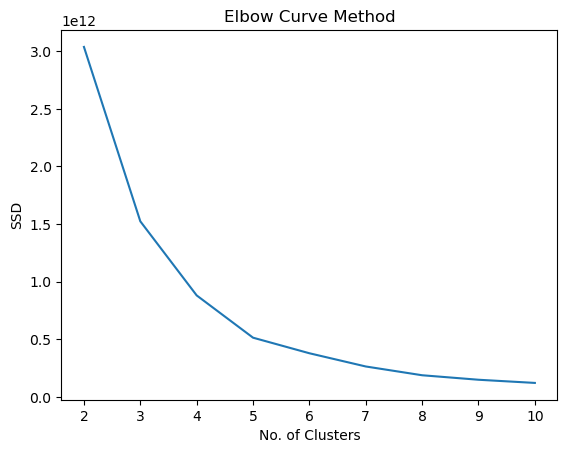


___________Silhouette Analysis___________



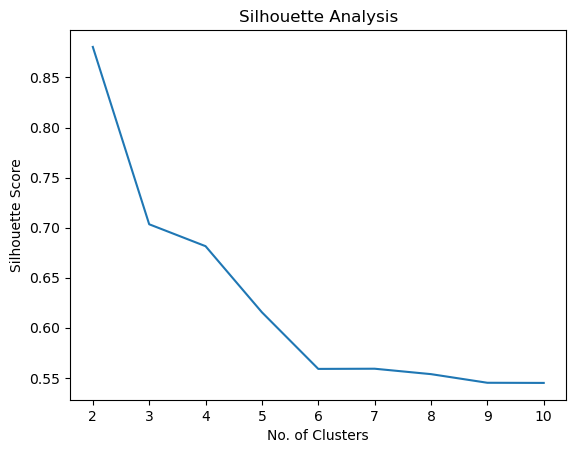


Cluster Labels are:
[0 0 0 ... 0 0 0]

Following are the Cluser groups within the dataset:
0    1352
2     227
1      53
Name: Cluster_Id, dtype: int64


In [64]:
Cluster_kmeans(dti_consolidated,0)

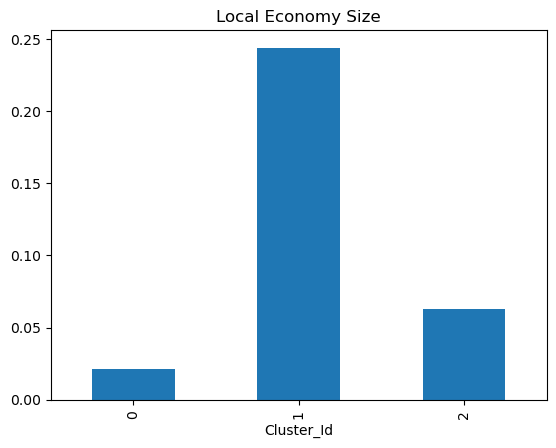

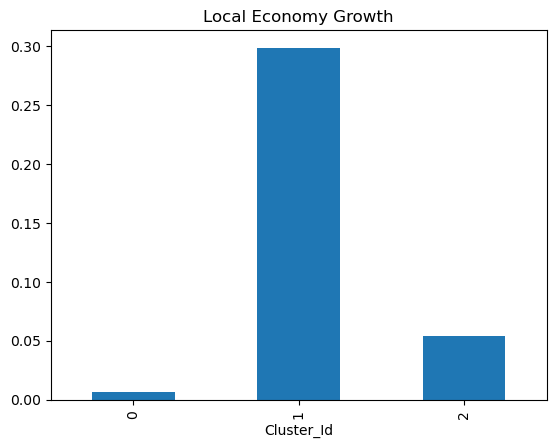

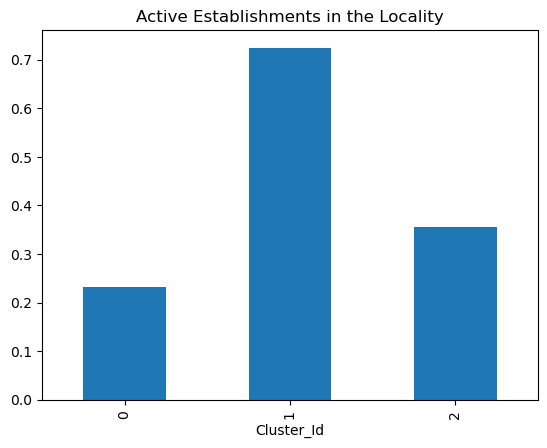

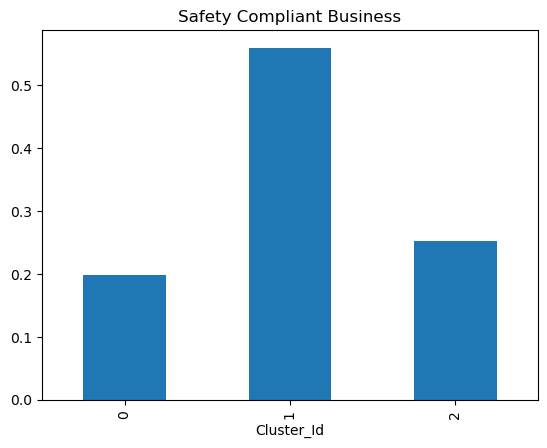

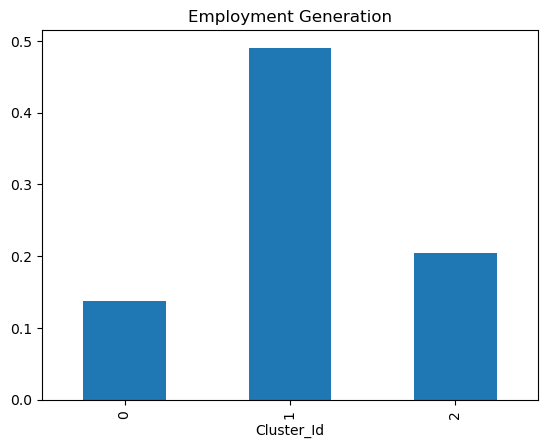

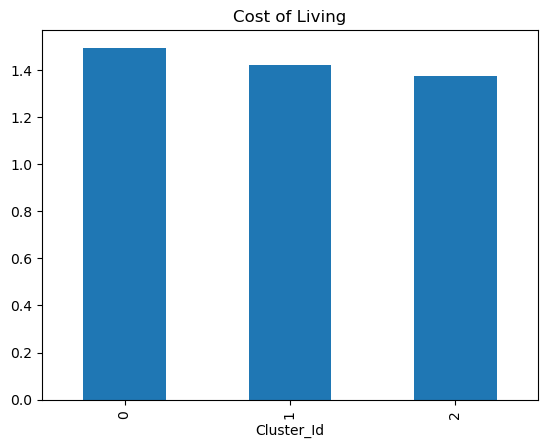

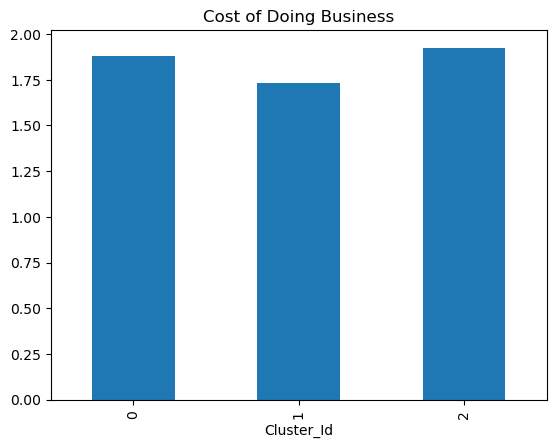

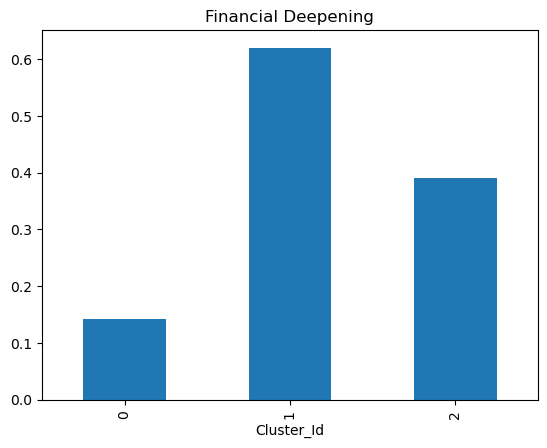

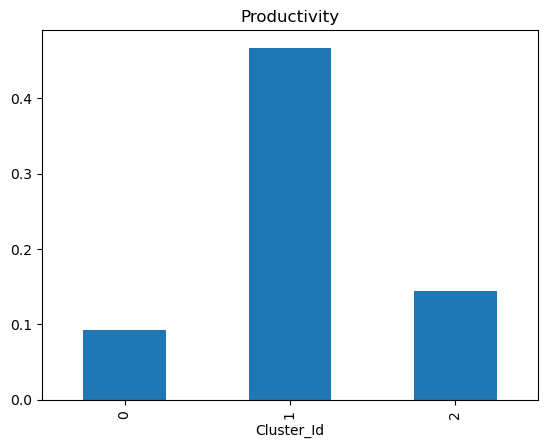

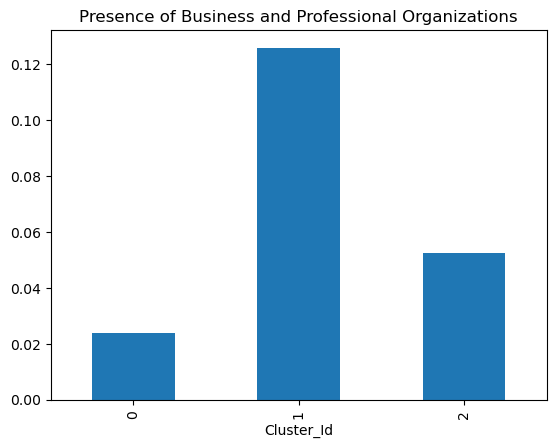

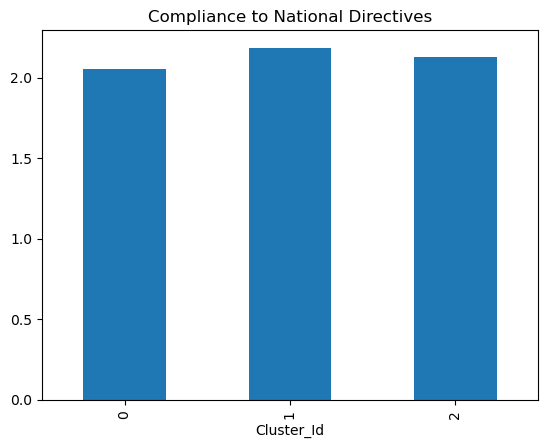

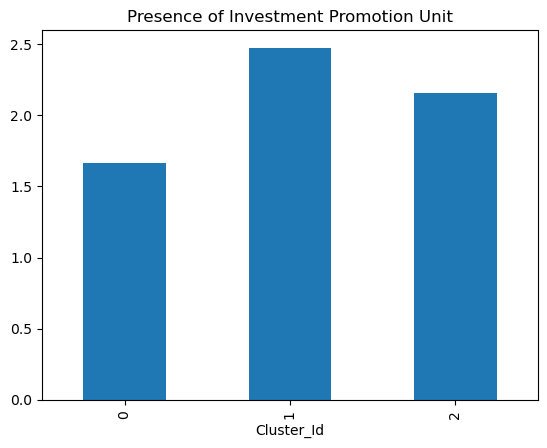

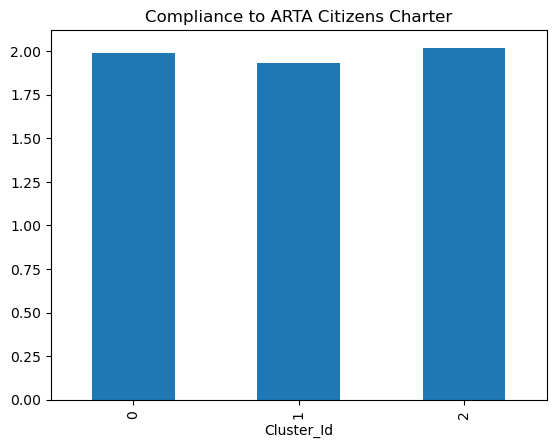

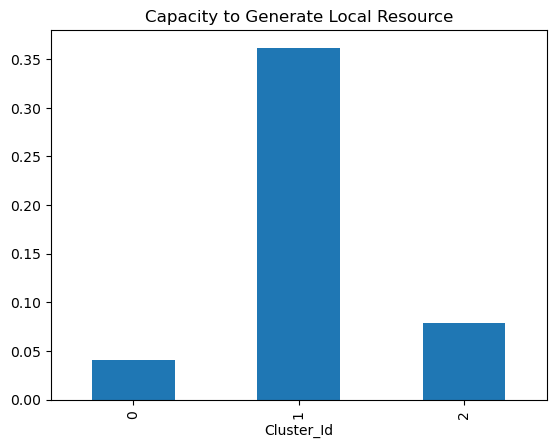

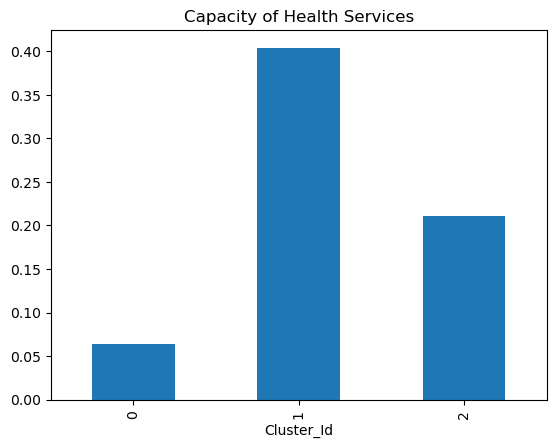

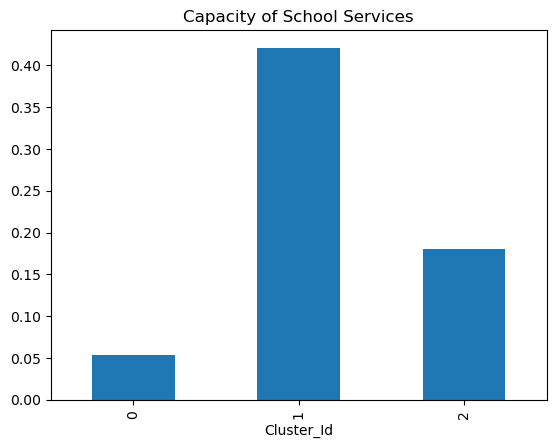

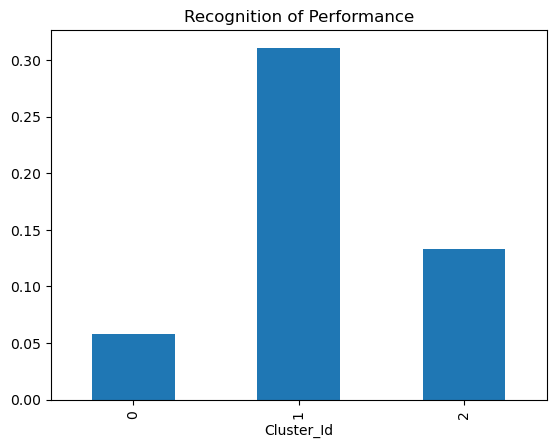

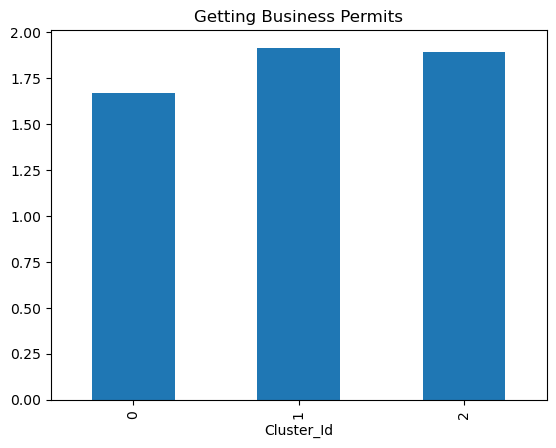

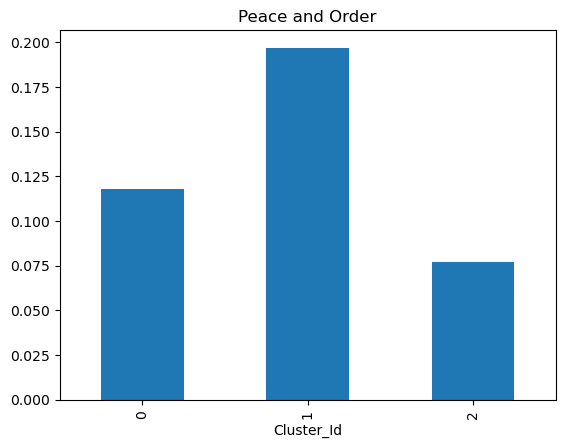

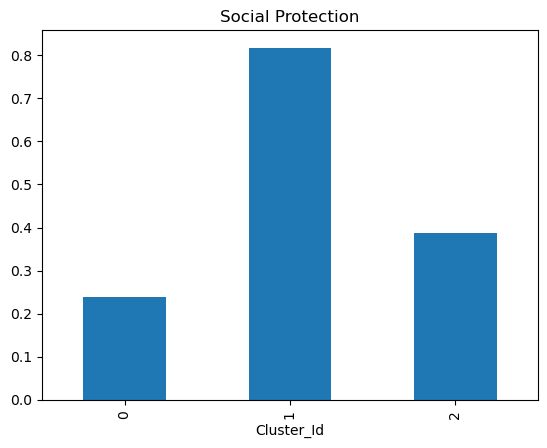

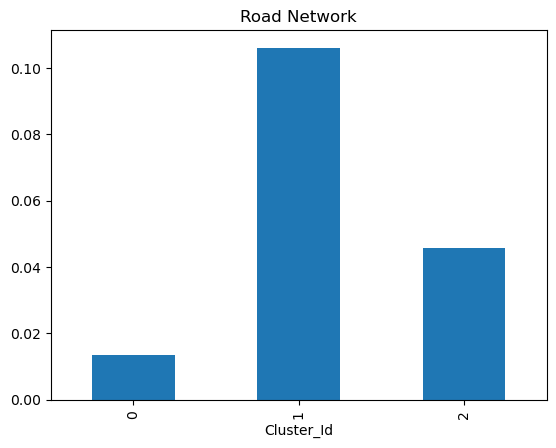

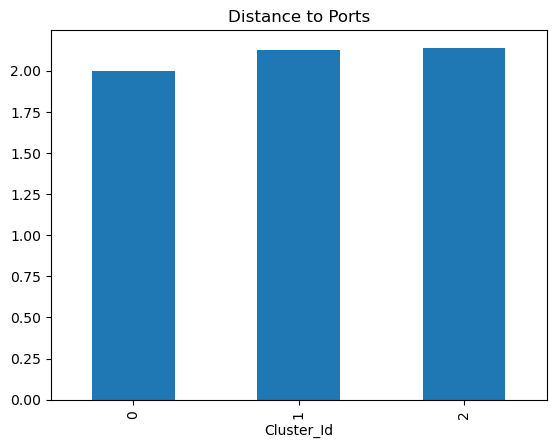

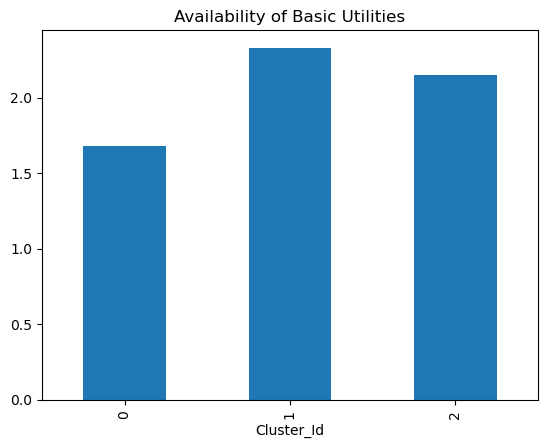

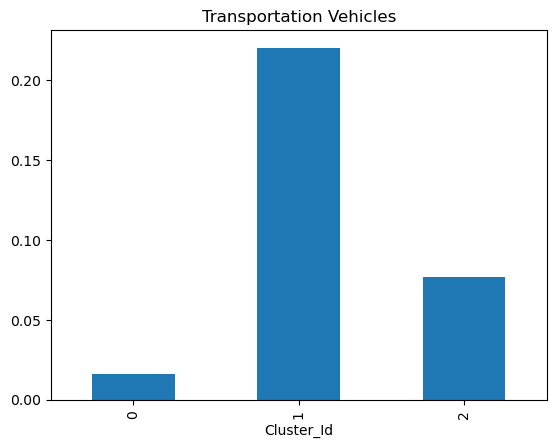

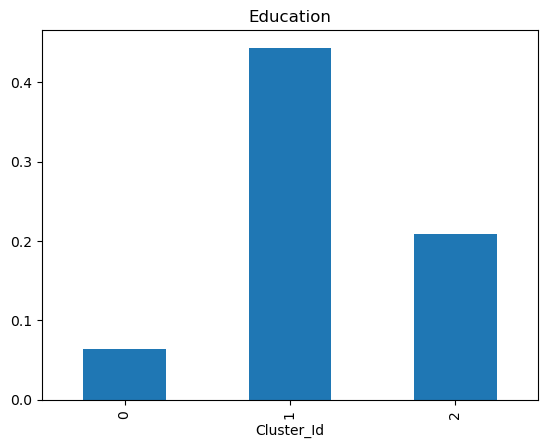

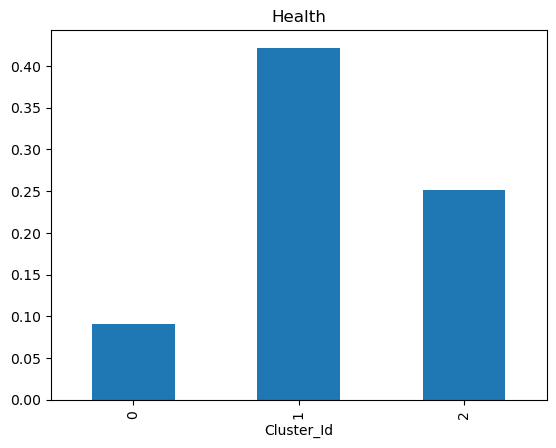

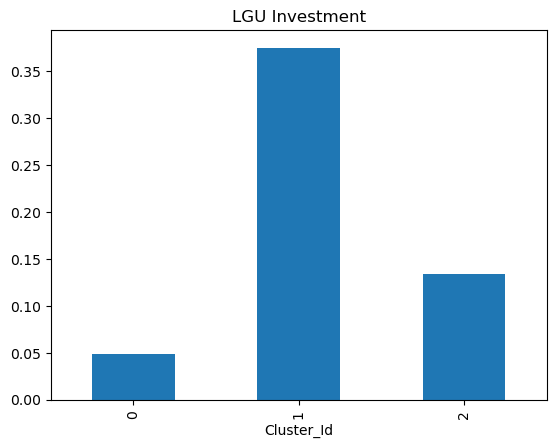

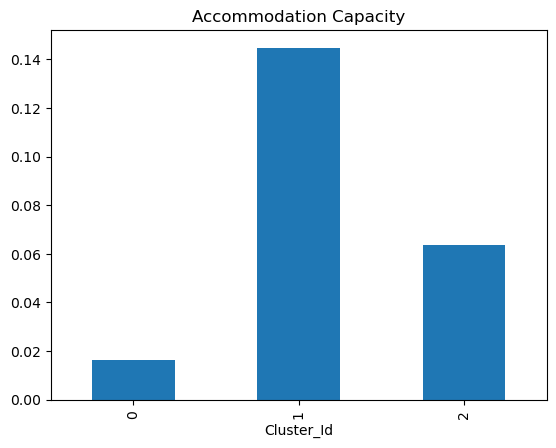

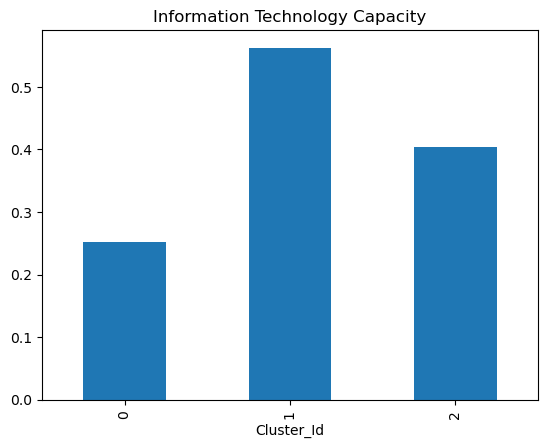

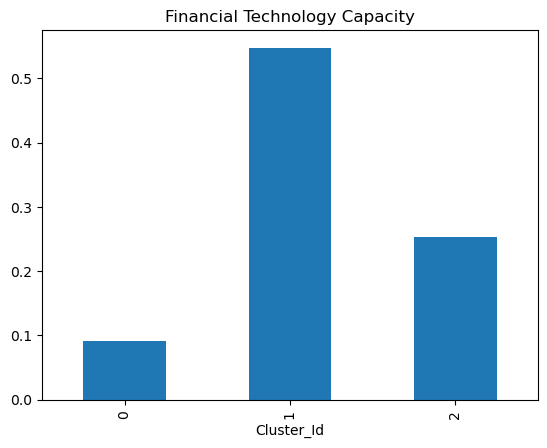

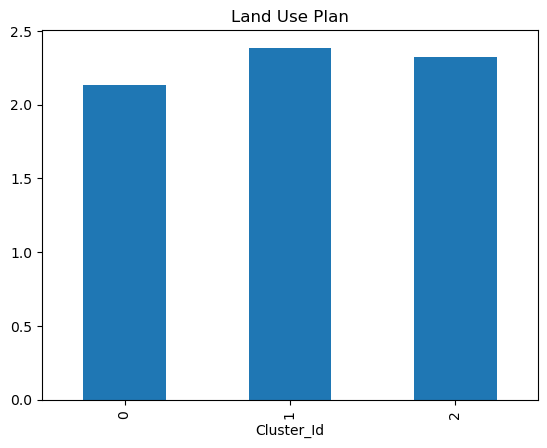

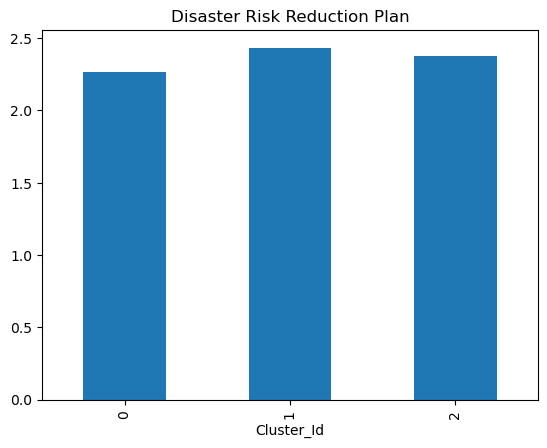

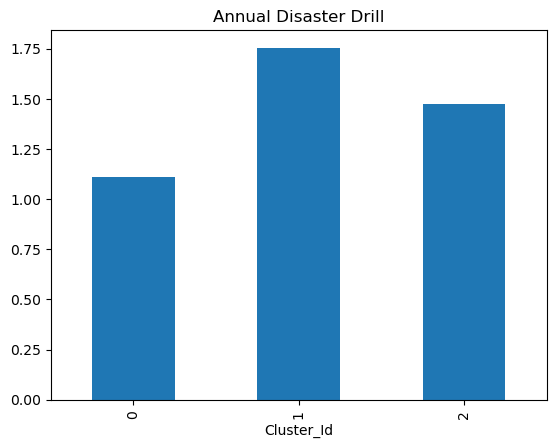

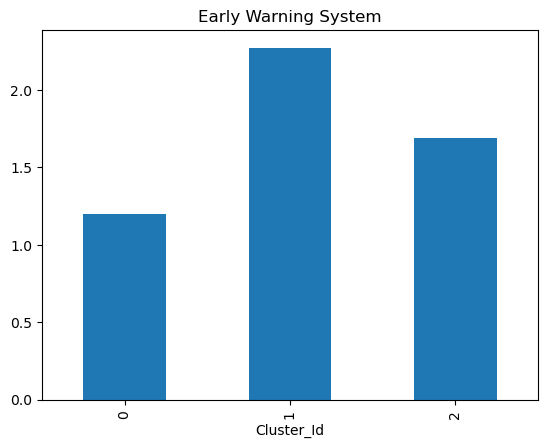

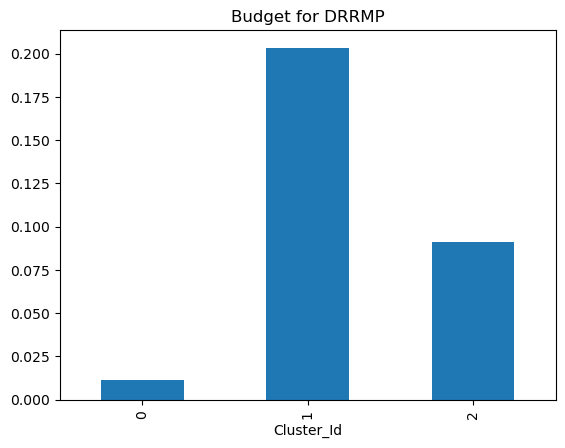

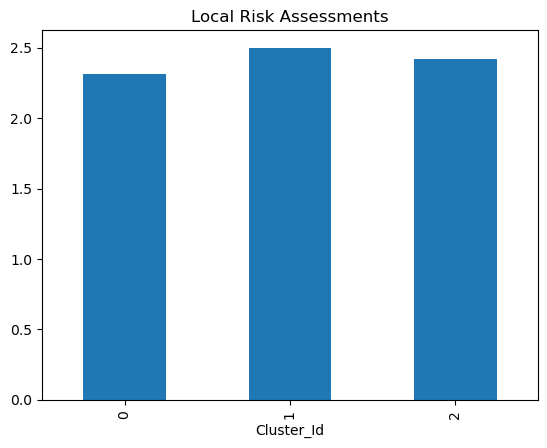

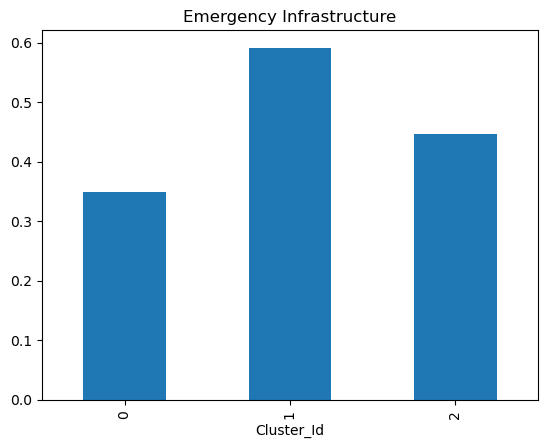

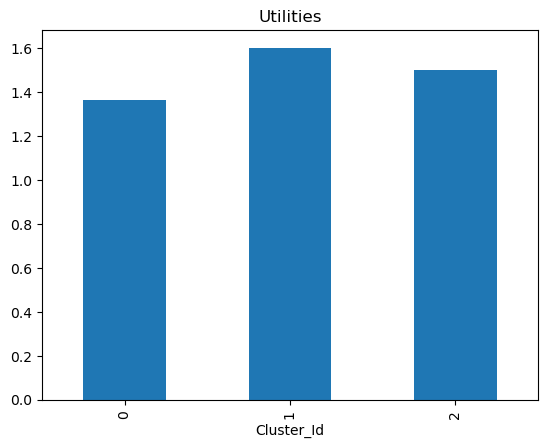

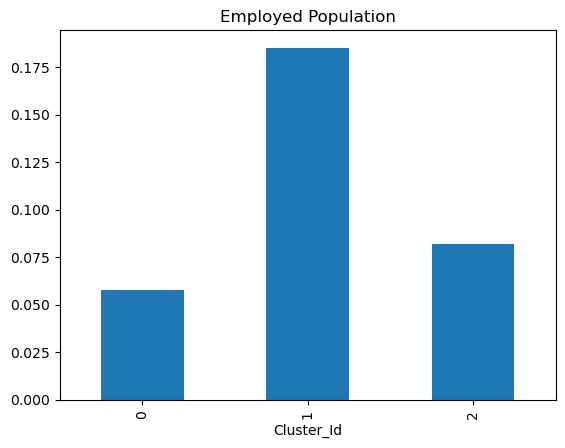

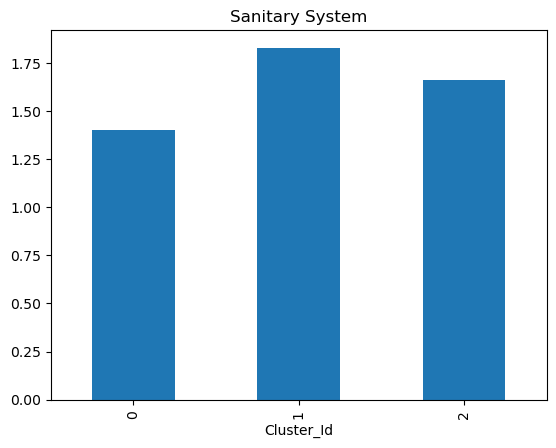

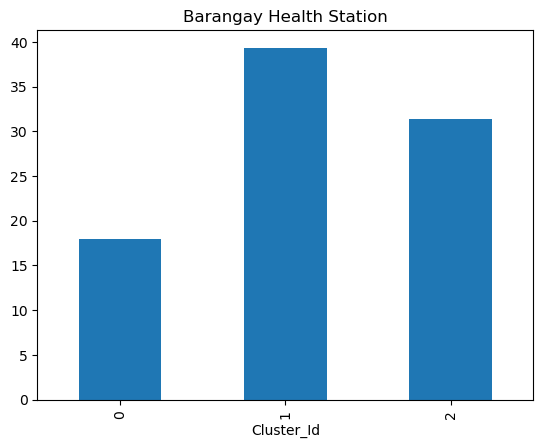

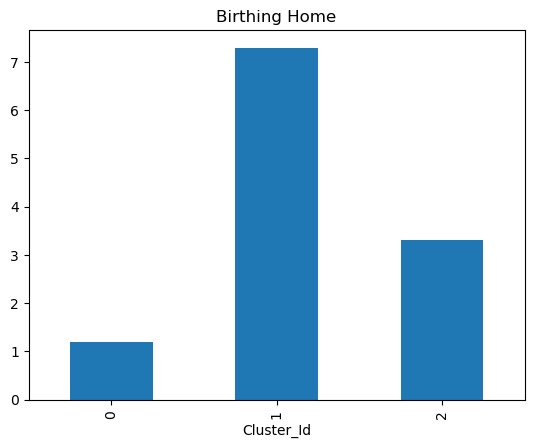

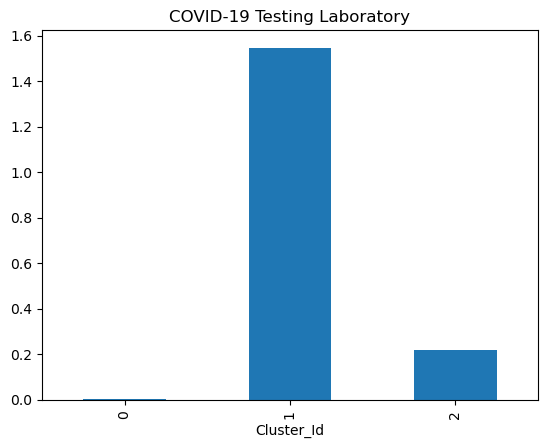

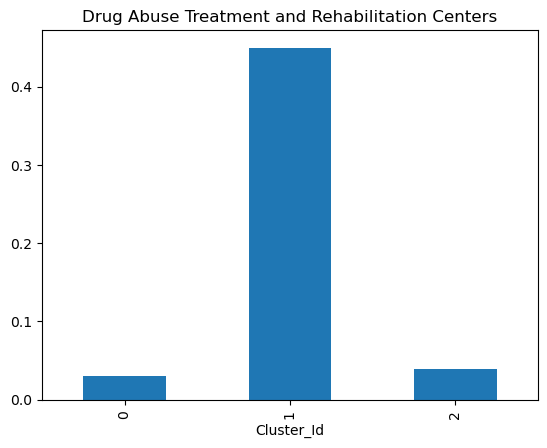

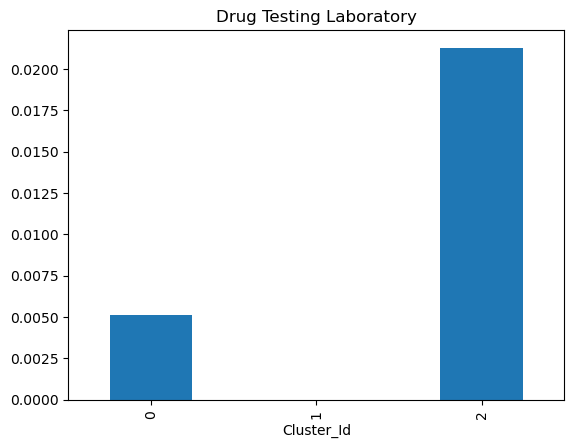

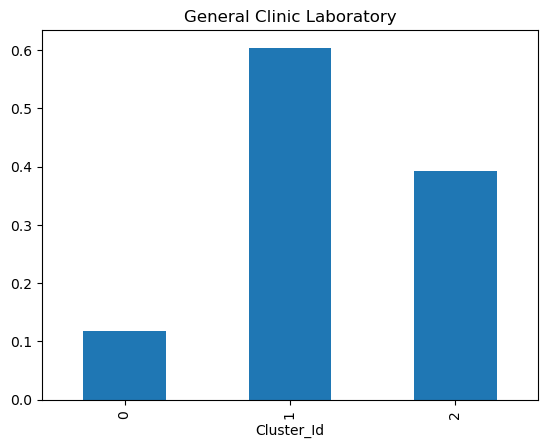

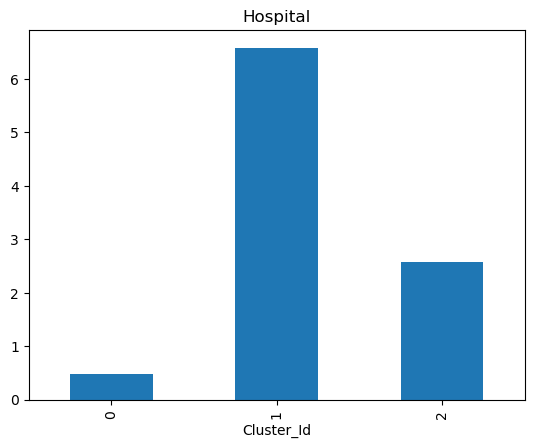

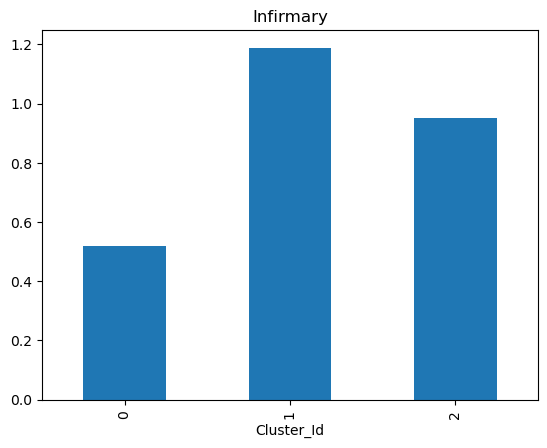

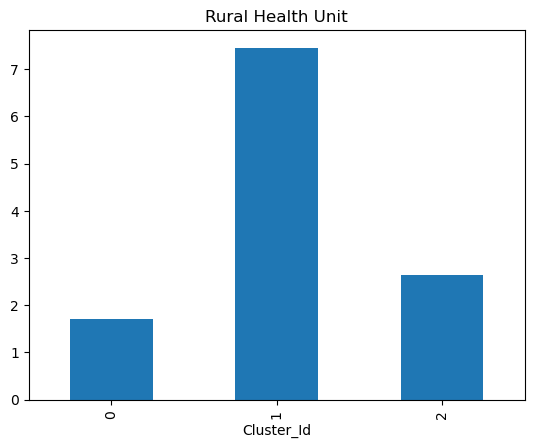

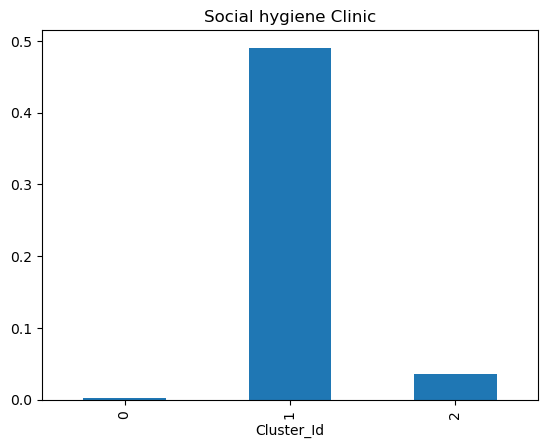

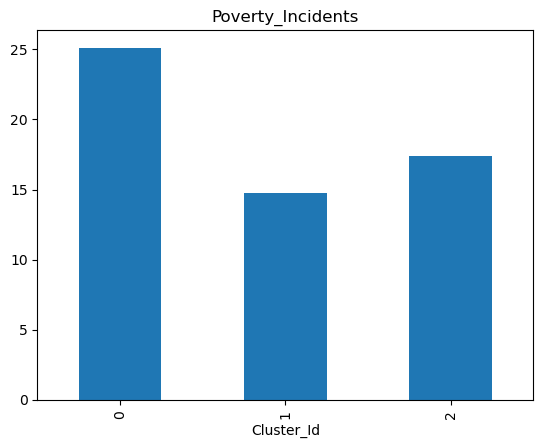

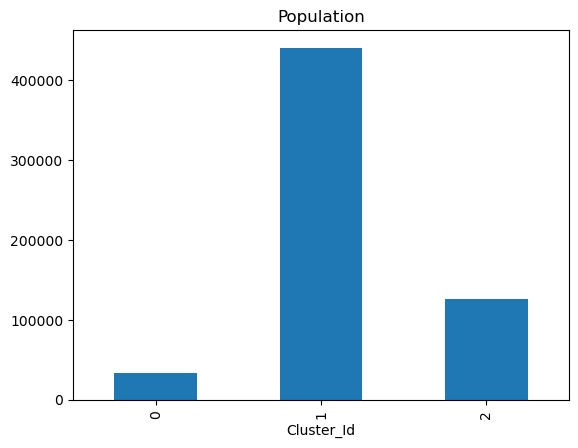

In [65]:
for col in dti_consolidated.columns.drop('Cluster_Id'):
    dti_consolidated[col].groupby(dti_consolidated['Cluster_Id']).mean().plot(kind = 'bar')
    plt.title(col)
    plt.show()

### 2.1(b) Feature selection for Decent Work and Economic Growth

In [66]:
feature_selection(dti_consolidated)

Fitting 4 folds for each of 75 candidates, totalling 300 fits

Our best estimator is:
RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=25,
                       n_jobs=-1, random_state=42)

Score of the best estimator is:
0.9851122561648877

____________Let's Validate the model with the test data:____________

Test Accuracy:
0.9836734693877551

____________Feature Importance:____________
                                              Varname       Imp
51                                         Population  0.452610
24                                          Education  0.054031
15                        Capacity of School Services  0.049437
1                                Local Economy Growth  0.046094
14                        Capacity of Health Services  0.037141
7                                 Financial Deepening  0.028629
34                                   Budget for DRRMP  0.024573
23                            Transportation Vehicles  0.023383
41         

In [67]:
dti_consolidated_final = dti_consolidated[
    ['Population', 'Education', 'Capacity of School Services',
    'Local Economy Growth', 'Capacity of Health Services',
    'Financial Deepening', 'Budget for DRRMP', 'Transportation Vehicles',
    'Birthing Home', 'Poverty_Incidents']]


Hopkins Statistics for this Pillar is 0.9528305970618227

Finding Optimum number of Clusters

___________Elbow Curve Method (SSD)___________


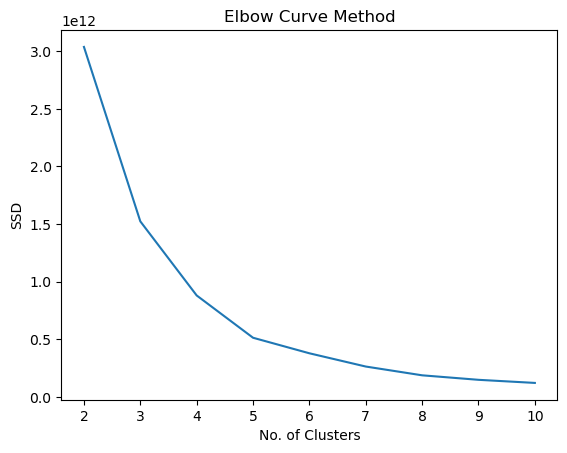


___________Silhouette Analysis___________



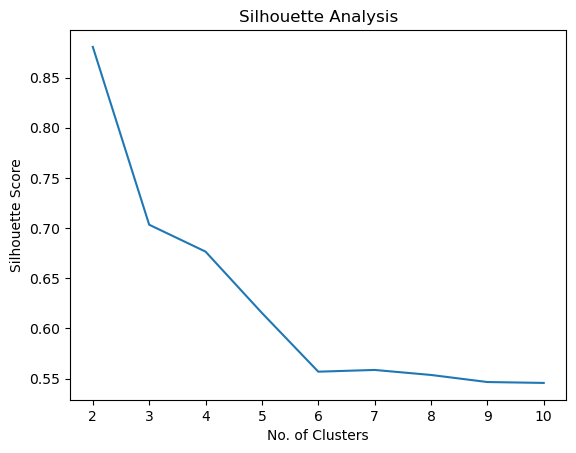


Cluster Labels are:
[0 0 0 ... 0 0 0]

Following are the Cluser groups within the dataset:
0    1352
2     227
1      53
Name: Cluster_Id, dtype: int64


In [68]:
Cluster_kmeans(dti_consolidated_final,1,'dti_pov_health.pkl')

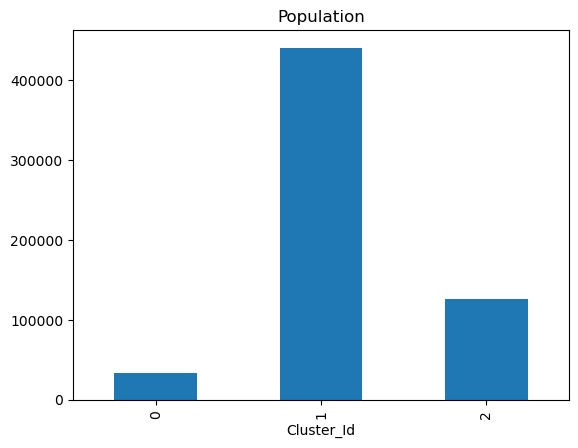

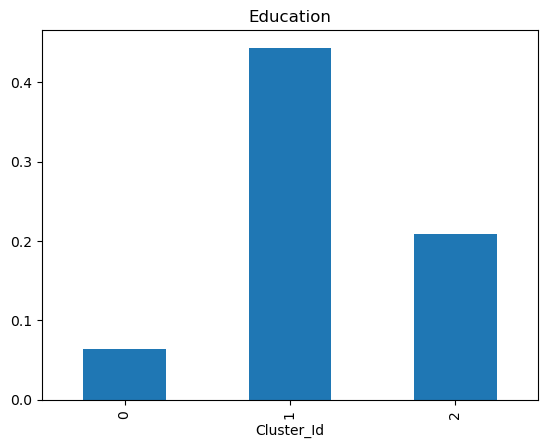

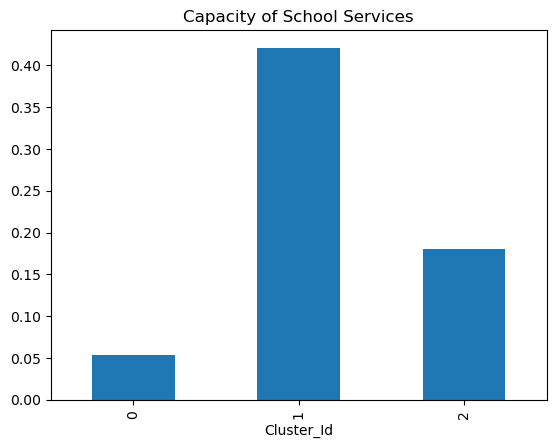

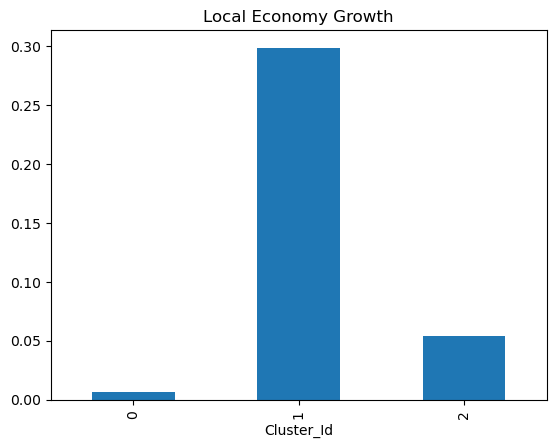

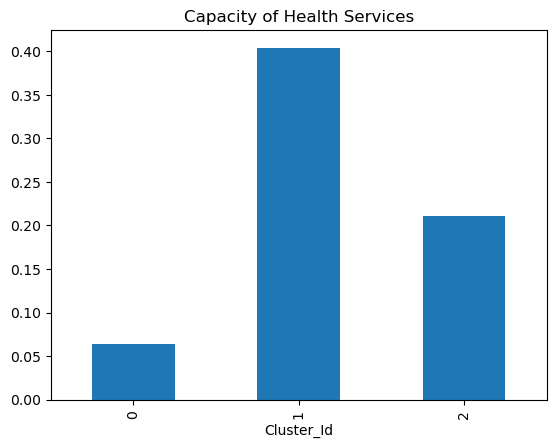

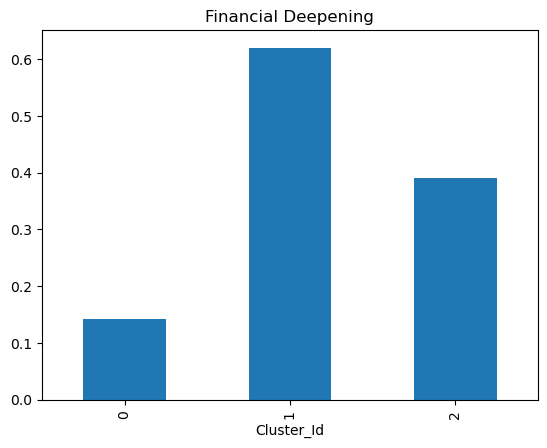

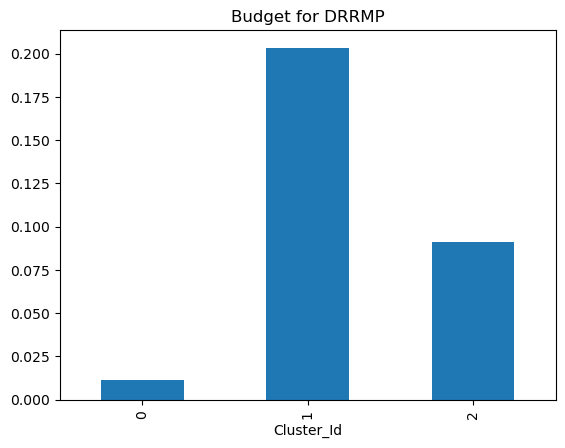

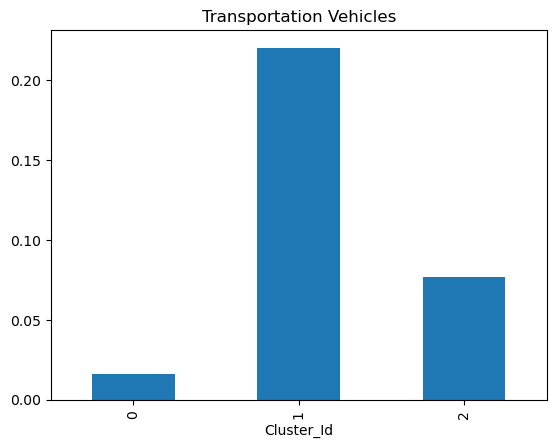

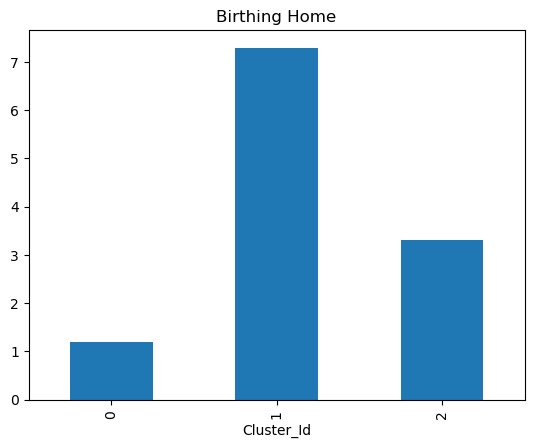

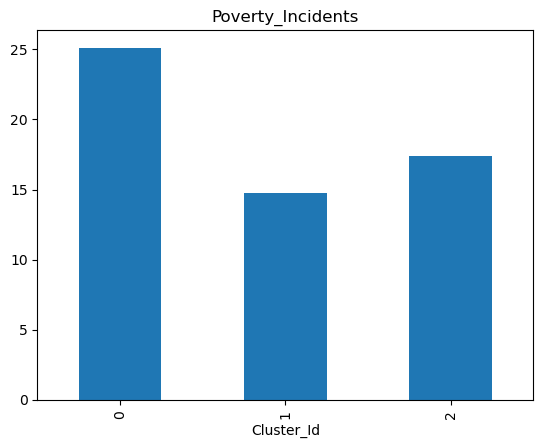

In [69]:
# Cluster Profiling
for col in dti_consolidated_final.columns.drop('Cluster_Id'):
    dti_consolidated_final[col].groupby(dti_consolidated_final['Cluster_Id']).mean().plot(kind = 'bar')
    plt.title(col)
    plt.show()

Cluster Profile
- 1 - Low Vulnerability
- 2 - Medium Vulnerability
- 0 - High Vulnerability

In [70]:
dti_consolidated_final

,Population,Education,Capacity of School Services,Local Economy Growth,Capacity of Health Services,Financial Deepening,Budget for DRRMP,Transportation Vehicles,Birthing Home,Poverty_Incidents,Cluster_Id
Aborlan,35091.00,0.0835,0.014500,0.0045,0.0587,0.1231,0.0215,0.0029,0.00,13.33,0
Abra De Ilog,31306.00,0.0159,0.001800,0.0071,0.0400,0.0443,0.0215,0.0564,0.00,20.46,0
Abucay,42984.00,0.0541,0.063800,0.0010,0.0903,0.3395,0.0024,0.0483,1.00,5.30,0
Abulug,32497.00,0.0812,0.080300,0.0013,0.1055,0.7000,0.0025,0.0185,0.00,14.79,0
Abuyog,59571.00,0.1394,0.092200,0.0027,0.0752,0.5127,0.0236,0.0260,4.00,28.17,0
...,...,...,...,...,...,...,...,...,...,...,...
Zamboanga,578635.69,0.6540,0.566435,0.5938,0.5353,0.3380,0.3572,0.1927,12.69,18.00,1
Zamboanguita,27552.00,0.0164,0.025200,0.0094,0.0427,0.1154,0.0017,0.0000,0.00,17.50,0
Zaragoza,53090.00,0.1016,0.104100,0.0013,0.0893,0.6109,0.0024,0.0737,2.00,3.82,0
Zarraga,27305.00,0.1270,0.091000,0.0021,0.0578,0.2607,0.0026,0.0175,0.00,10.83,0
